###**Bike Sharing Predictor-Group 25**

Group Members:

Alperen Yıldız

Metin Alperen Balta

Rebah Özkoç

Ekin Nalbantoğlu

Utku Alkan

Uğurhan Altınbaş

## Introduction

With the advent of bike rental services such as Bike Rental NYC, bike rentals have increased. While bike rental rates have stayed fairly consistent over the years in certain cities and regions, there have been times where rental rates plummet or skyrocket. Not having an idea of when will these changes happen or which factors affect these rates could cause bike rental companies to be improperly prepared on certain days and harm their profits. To solve this problem, we have used an example dataset that contains information about the rates of bike rentals from 2011 to 2012 in Washington D.C. We have interpreted the correlations between factors and utilized hypothesis testing to understand which elements affect bike rental rates, then implemented a random forest based algorithm to see whether we could predict the rental rates of a specific day.

### Problem Definition

While knowing the average bike rental rates help rental companies to prepare for a day roughly, every day has different properties when it comes to factors like temperature, humidity etc. Even with the assumption that, for example, weather conditions affect rental rates, not knowing precisely how these conditions will influence rental rates could cause rental companies to make faulty decisions, therefore minimizing their profits. Mistakenly predicting that on a specific day the rental rates will be higher could cause companies to assign unnecessary personnel and bikes to some regions while the regions that have higher demands would be understaffed and short of bikes. Estimating the demand on a certain day mistakenly could also cause maintenance checks on bikes to fall behind, either compromising the safety of users or the number of bikes available. An algorithm that helps to accurately predict a specific day’s bike demands would greatly reduce these problems’ severity.

### Utilized Datasets And Methods


&emsp; In this project, we have used the Bike Sharing Dataset which is presented by UC Irvine Machine Learning Repository. It can be accessed from [here](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset#). This data set contains information about the rental rates of bikes of the Capital Bikeshare system, Washington D.C., USA in 2011 and 2012. It combines this rental data with corresponding weather and seasonal data and gives insight about their relation. 

&emsp; This data set consists of two .csv files. These are day.csv and hour.csv. The hour.csv contains one more column namely hour than day.csv which divides the bike-sharing data hour by hour. Both of them accommodate social and environmental attributes, as columns, that may be in correlation with the rental bike count such as seasons, holidays, workdays, weekdays, situation of the weather, temperature, feeling temperature, humidity and wind speed. Datasets also include date, year, month and hour(exclusive for hour.csv) to provide a time aspect of rental bike counts. Total count can also be inspected under two other columns: casual and registered, by providing the proportions of both.

&emsp; For the sake of our project, we have utilized various graphs to show the correlation between data. We have done differing hypothesis tests like t-tests and analysis of variance tests to confirm our interpreted correlations. Then we have implemented various machine learning algorithms like the K-Nearest Neighbors algorithm, linear regression algorithm, decision-tree algorithm and random forest algorithm. We have also utilized Ensemble learning models and created our own class to compare.

&emsp; In day.csv, there are a total of 731 observations, and on the other hand 17379 are present in hour.csv. All the data was worked on after creating a Pandas DataFrame.



In [34]:
from google.colab import drive
drive.mount("./drive")

path_prefix = "./drive/MyDrive"
import pandas as pd
import numpy as np
from scipy import stats
from scipy import special
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join

%matplotlib inline

fname = "day.csv"
df = pd.read_csv(join(path_prefix, fname), sep=';')
df_copy = df.copy()

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


Importing libraries and reading day.csv file

In [35]:
from google.colab import drive
drive.mount("./drive")

path_prefix = "./drive/MyDrive"
fname2 = "hour.csv"
df2 = pd.read_csv(join(path_prefix, fname2), sep=';')
df2_copy = df2.copy()

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


Reading hour.csv file

In [36]:
a = df.isnull().sum().sum()
print("Null values in day.csv ->" , a)
b = df2.isnull().sum().sum()
print("Null values in hour.csv ->" , b)

Null values in day.csv -> 0
Null values in hour.csv -> 0


For our experiments and tests, it was crucial to see whether our dataset had any NULL values. As it can be seen, there are no NULL values in our datasets.

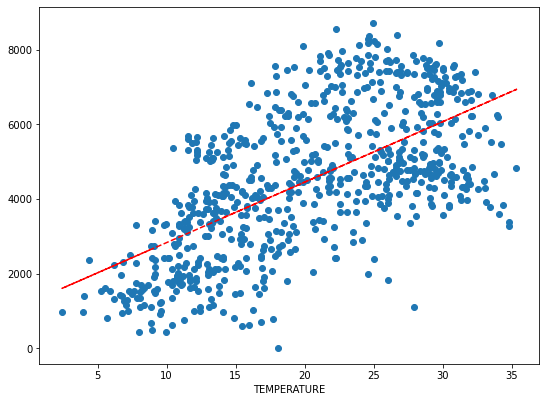

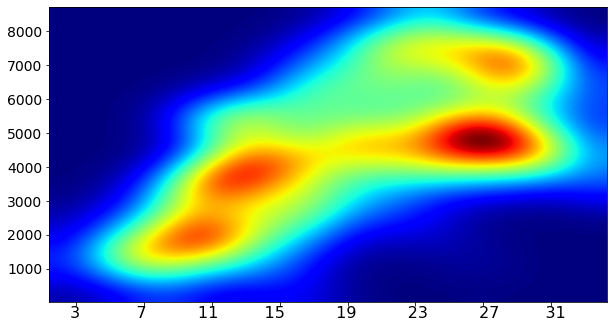

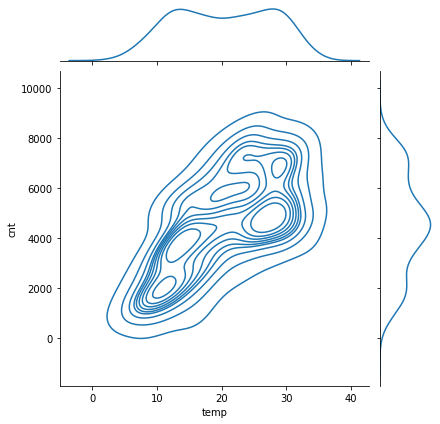

In [37]:
#TEMPERATURE
df_copy['temp'] = df['temp'].mul(41)
plt.scatter(df_copy['temp'], df_copy['cnt'])
plt.xlabel("TEMPERATURE")

fit = np.polyfit(df_copy['temp'], df_copy['cnt'], deg=1) 
p = np.poly1d(fit) 
plt.plot(df_copy['temp'],p(df_copy['temp']),"r--")

plt.tight_layout(-5)
plt.show()
#-----------------------------------------------------------------


import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

fig, axs =plt.subplots(figsize=(10, 8)) 

x = df_copy['temp']
y = df_copy['cnt']

img, extent = myplot(500*x, y, 64)
for label in axs.xaxis.get_ticklabels():
    label.set_color('tab:red')
    label.set_fontsize(16)
    label.set_visible(False)

axs.set_xlabel(" 3           7          11         15          19          23          27         31     ",  fontsize=16)
axs.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
plt.setp(axs.get_yticklabels(), Fontsize=14)

plt.show()

#-----------------------------------------------------------------
x = df_copy['temp']
y = df_copy['cnt']
sns.jointplot(x=x, y=y, kind='kde')
plt.show()

"Temperature vs count" graphs

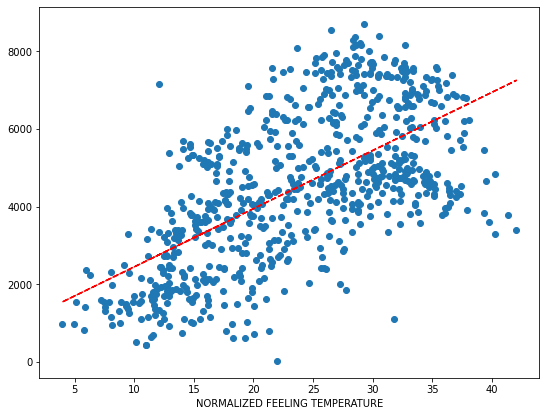

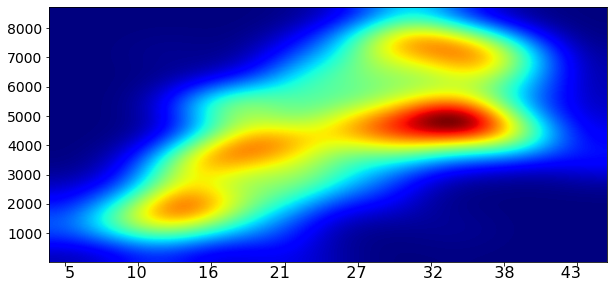

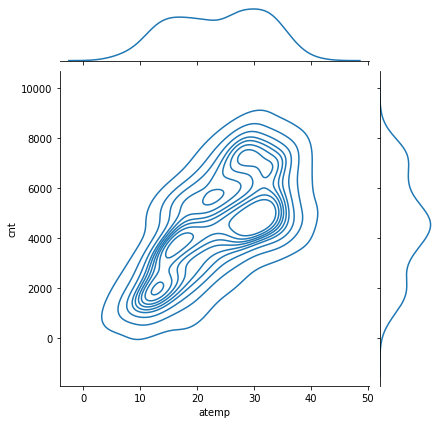

In [38]:
#NORMALIZED FEELING TEMPERATURE
df_copy['atemp'] = df['atemp'].mul(50)

plt.scatter(df_copy['atemp'], df_copy['cnt'])
plt.tight_layout(-5)
plt.xlabel("NORMALIZED FEELING TEMPERATURE")

fit = np.polyfit(df_copy['atemp'], df_copy['cnt'], deg=1) 
p = np.poly1d(fit) 
plt.plot(df_copy['atemp'],p(df_copy['atemp']),"r--")

plt.show()
#-----------------------------------------------------------------------

fig, axs =plt.subplots(figsize=(10, 8)) 

x = df_copy['atemp']
y = df_copy['cnt']

img, extent = myplot(500*x, y, 64)
for label in axs.xaxis.get_ticklabels():
    label.set_fontsize(16)
    label.set_visible(False)

axs.set_xlabel("5          10          16          21           27           32          38         43  ",  fontsize=16)
axs.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
plt.setp(axs.get_yticklabels(), Fontsize=14)

plt.show()
#-----------------------------------------------------------------
x = df_copy['atemp']
y = df_copy['cnt']
sns.jointplot(x=x, y=y, kind='kde')
plt.show()

"Apparent temperature vs count" graphs

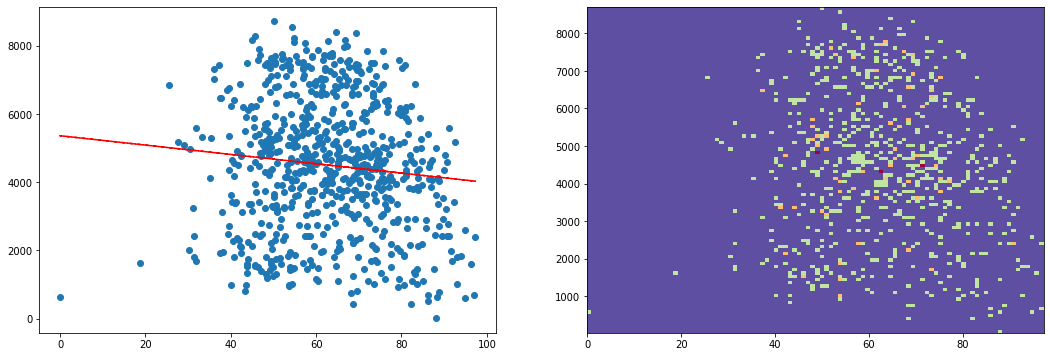

In [39]:
#HUMIDITY
df_copy['hum'] = df['hum'].mul(100)
fig,ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].scatter(df_copy['hum'], df_copy['cnt'])

fit = np.polyfit(df_copy['hum'], df_copy['cnt'], deg=1) 
p = np.poly1d(fit) 
ax[0].plot(df_copy['hum'],p(df_copy['hum']),"r--")

fig.show()

#-----------------------------------------------------------------------

x = df_copy['hum']
y = df_copy['cnt']
ax[1].hist2d(x,y,bins=100, cmap = 'Spectral_r')

fig.show()

### Humidity vs count graphs

This graph shows that an increase in humidity resulted in fewer bike rentals. One thing to note in this graph might be the fact that data representing humidity levels lesser than 40% is underrepresented in this dataset, presumably due to the climate of the city. Thus, inferences stemming from lower humidities might be suboptimal but due to the trend that is shown in the graph we can presume rentals will be slightly higher.


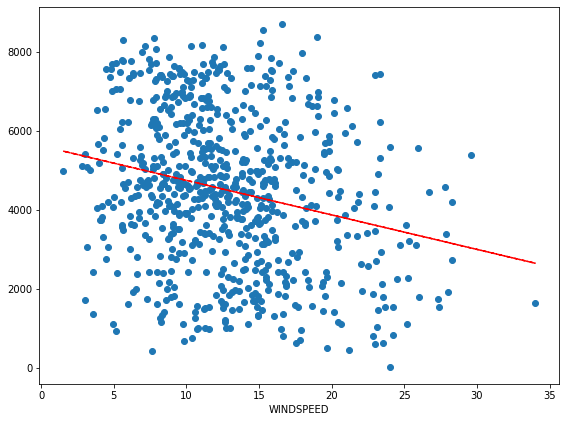

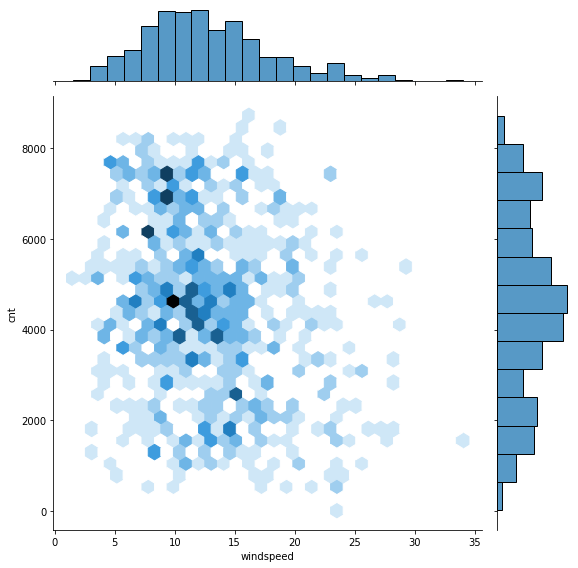

In [ ]:
#WINDSPEED
df_copy['windspeed'] = df['windspeed'].mul(67)
plt.scatter(df_copy['windspeed'], df_copy['cnt'])
plt.xlabel("WINDSPEED")

fit = np.polyfit(df_copy['windspeed'], df_copy['cnt'], deg=1) 
p = np.poly1d(fit) 
plt.plot(df_copy['windspeed'],p(df_copy['windspeed']),"r--")

plt.tight_layout(-6)
plt.show()


#-----------------------------------------------------------------------

x = df_copy['windspeed']
y = df_copy['cnt']

sns.jointplot(x=x, y=y, kind='hex', joint_kws=dict(gridsize=31), height=8)

plt.show()

### Windspeed vs count graphs

Increased windspeeds are an unwanted factor for bike rentals as expected. Both graphs show a negative correlation between these two variables. The hex graph is an alternative representation of the same occurence and shows that the most amount of data is recorded between 5-10 per windspeed. 


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


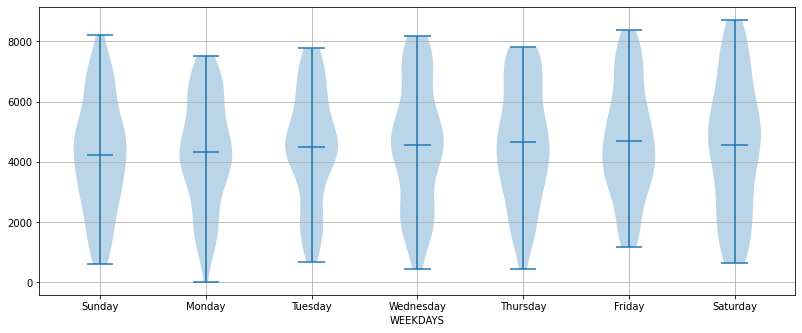

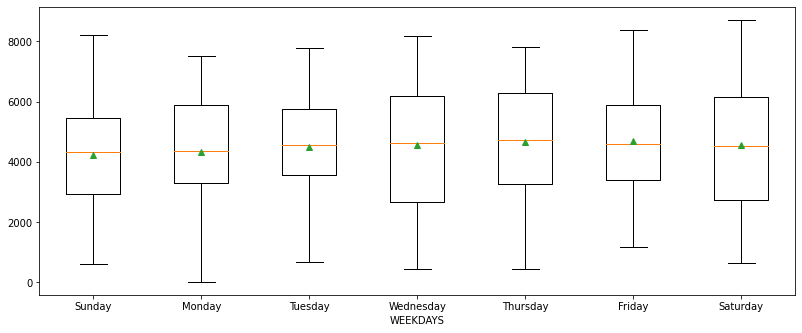

In [ ]:
n_plotList=[[],[],[],[],[],[],[]]
for i in range(df_copy.shape[0]):
  n_plotList[df_copy["weekday"][i]].append(df_copy["cnt"][i])
fig = plt.figure()
axe = fig.add_axes([0,0,1.75,1])
axe.violinplot(n_plotList, showmeans=True)

axe.grid()

nums = [1,2,3,4,5,6,7]
myList1 = ["Sunday" , "Monday", "Tuesday", "Wednesday" , "Thursday", "Friday", "Saturday"]
plt.xticks(nums, myList1)
plt.xlabel("WEEKDAYS")
plt.show()
#-----------------------------------------
fig = plt.figure()
axe = fig.add_axes([0,0,1.75,1])
axe.boxplot(n_plotList, showmeans=True)
nums = [1,2,3,4,5,6,7]
myList1 = ["Sunday" , "Monday", "Tuesday", "Wednesday" , "Thursday", "Friday", "Saturday"]
plt.xticks(nums, myList1)
plt.xlabel("WEEKDAYS")
plt.show()

### Weekdays vs count graphs

Both the box plot and violin plot show the same information regarding bike rnetals. The medians of bike rentals were not affected a lot by the days of the week. This is particularly interesting when one compares friday and saturday with the weekdays. This may show that for this particular city, bikes are mostly used as a mean of transportation rather than leisure. 

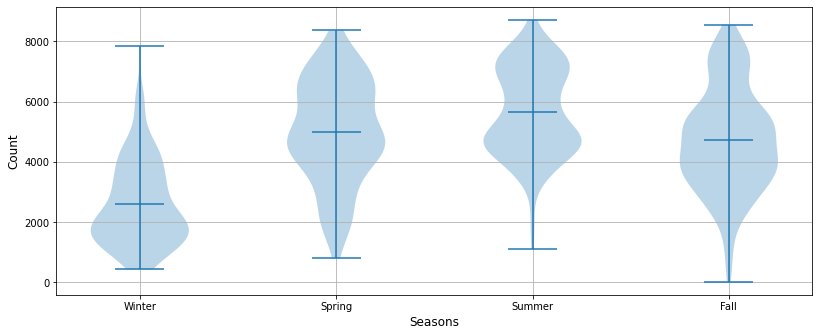

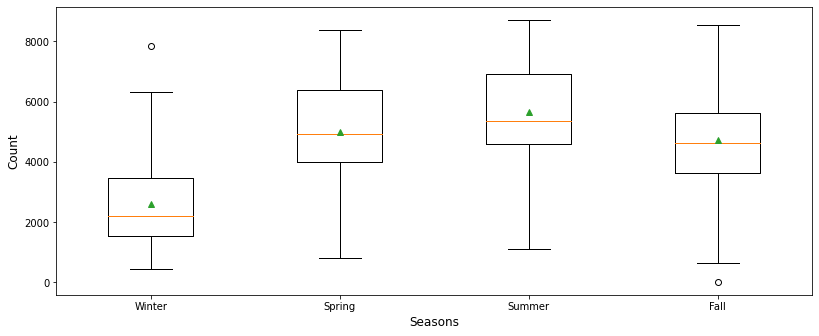

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
n_plotList=[[],[],[],[]]
for i in range(df_copy.shape[0]):
  n_plotList[df_copy["season"][i] - 1].append(df_copy["cnt"][i])
fig = plt.figure()
axe = fig.add_axes([0,0,1.75,1])
axe.violinplot(n_plotList, showmeans=True)
axe.grid()
nums2 = [1,2,3,4]
myList2 = ["Winter", "Spring", "Summer", "Fall"]
plt.xticks(nums2, myList2)
plt.ylabel("Count",fontdict={'fontsize':12})
plt.xlabel("Seasons",fontdict={'fontsize':12})

plt.show()
fig = plt.figure()
axe = fig.add_axes([0,0,1.75,1])
axe.boxplot(n_plotList, showmeans=True)
nums2 = [1,2,3,4]
myList2 = ["Winter", "Spring", "Summer", "Fall"]
plt.xticks(nums2, myList2)
plt.ylabel("Count",fontdict={'fontsize':12})
plt.xlabel("Seasons",fontdict={'fontsize':12})
plt.show()


#### Seasons vs count graphs

The box plots show a stark difference between the seasons which is as expected. Bike rentals usually took place in spring and summer seasons as opposed to fall and winter which is indicative that some seasons are much more suitable for bike rentals for this particular city.

1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


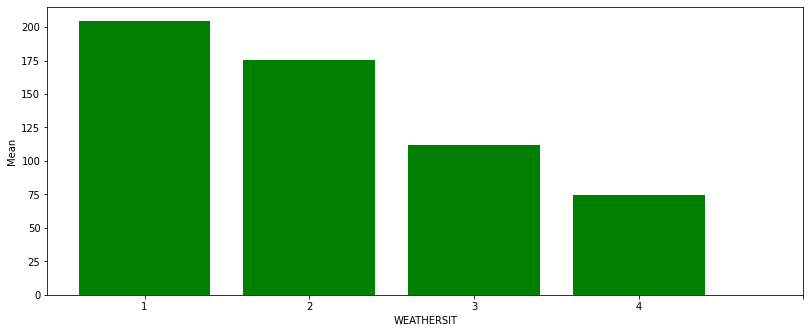

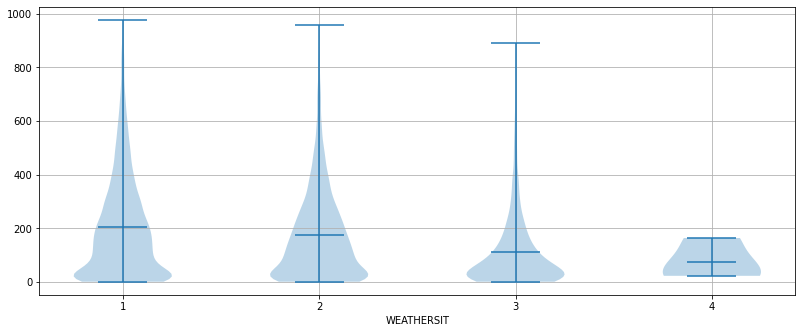

In [ ]:
#WEATHERSIT w.r.t hours 

fig, ax = plt.subplots()
fig.add_axes([0,0,1.75,1])

x1 = df2_copy.groupby('weathersit').mean().reset_index()
plt.bar(range(len(x1)), x1['cnt'], color="green")
plt.xticks(range(len(x1)), x1['weathersit'])
plt.ylabel('Mean')


print("1: Clear, Few clouds, Partly cloudy, Partly cloudy")
print("2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist")
print("3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds")
print("4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog")

nums3 = [0,1,2,3,4]
myList3 = [1,2,3,4]
plt.xticks(nums3, myList3)

plt.xlabel("WEATHERSIT")
plt.show()
#------------------------------------------
n_plotList=[[],[],[],[]]
for i in range(df2_copy.shape[0]):
  n_plotList[df2_copy["weathersit"][i]-1].append(df2_copy["cnt"][i])
fig1 = plt.figure()
axe1 = fig1.add_axes([0,0,1.75,1])
axe1.violinplot(n_plotList, showmeans=True)
nums4 = [1,2,3,4]
myList4 = [1,2,3,4]
plt.xticks(nums4, myList4)

plt.xlabel("WEATHERSIT")
axe1.grid()
plt.show()

#### Weather situation vs average count graphs with respect to hours

The most suitable weather for bike rentals is when the weather is either sunny or partially cloudy and the worst weather is when there is a storm going on or when it is snowing. The inference gained through these graphs are persumably also dependent on the seasons as well. One can also see that since all weather categorizations have an adequate amount of data, this particular city has a climate that shows characteristics of all seasons in a given year.



Between 1.01.2011 and 31.12.2012


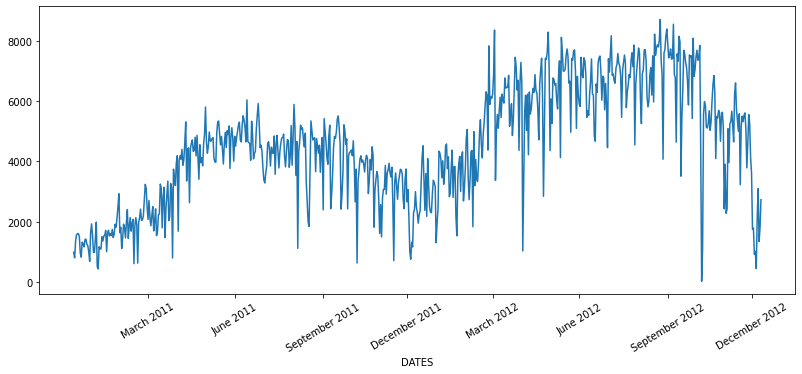

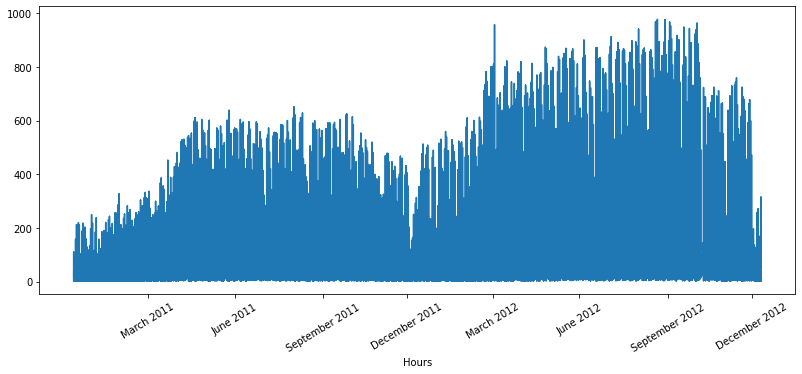

In [ ]:
#DATES
fig = plt.figure()
fig.add_axes([0,0,1.75,1])
plt.plot(df_copy['dteday'],df_copy['cnt'])
plt.xticks([],[])
plt.xlabel("DATES")
print("Between 1.01.2011 and 31.12.2012")
nums4 = ["21.03.2011","21.06.2011","23.09.2011","21.12.2011","21.03.2012","21.06.2012","23.09.2012","21.12.2012"]
myList4 = ["March 2011", "June 2011", "September 2011", "December 2011","March 2012", "June 2012", "September 2012", "December 2012"]
plt.xticks(nums4, myList4)
plt.xticks(rotation=31)
plt.show()
fig = plt.figure()
fig.add_axes([0,0,1.75,1])
plt.plot(df2_copy['dteday'],df2_copy['cnt'])
plt.xticks([],[])
plt.xlabel("Hours")
plt.xticks(nums4, myList4)
plt.xticks(rotation=31)
plt.show()

#### The change in count values with respect to days and hours between 1.01.2011 and 31.12.2012

The seasonal data coming from this graph matches perfectly with the subsequent two graphs. One interesting insight this graph provides is the fact that the bike rentals in these given dates have an M, shape. This information might correspond to a turbulent trend in bike sharing but when one combines this with the insight that bike sharing strongly corresponds with weather and therefore seasons (as demonstrated in subsequent graphs), the bike rentals data shows a strongly increasing demand.

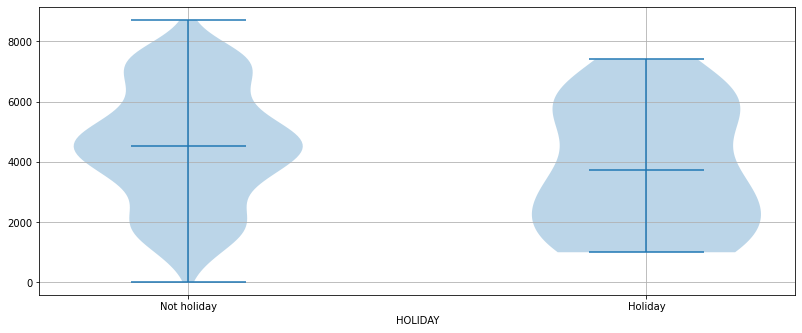

In [ ]:
#HOLIDAY
n_plotList=[[],[]]
for i in range(df_copy.shape[0]):
  n_plotList[df_copy["holiday"][i]].append(df_copy["cnt"][i])
fig = plt.figure()
axe = fig.add_axes([0,0,1.75,1])
axe.violinplot(n_plotList, showmeans=True)

axe.grid()

nums6 = [1,2]
myList6 = ["Not holiday", "Holiday"]
plt.xticks(nums6, myList6)
plt.xlabel("HOLIDAY")
plt.show()

#### Holiday or not vs count graph

These graphs show that holidays and working days show different attitudes to bike sharing. One hypothesis to explain this difference might be during holidays bikes are mostly used for leisure or transportation to social avenues while during working days, bikes are mostly used for transportation to business venues.

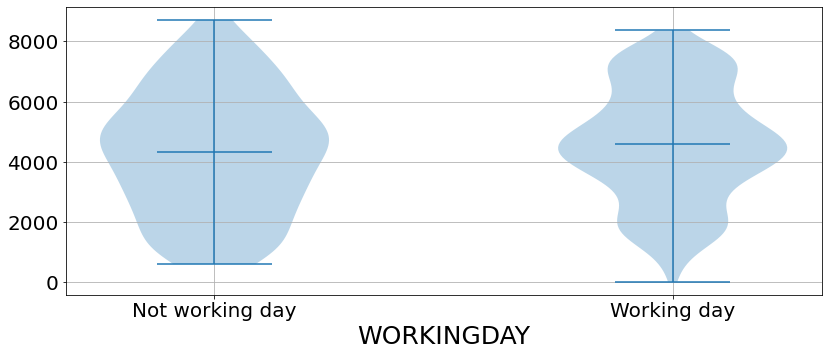

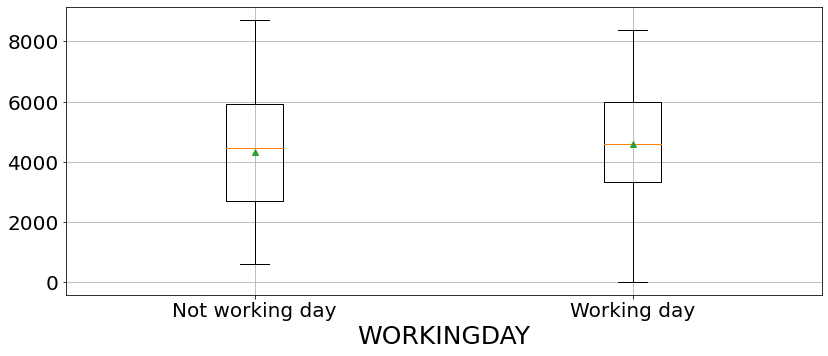

In [ ]:
#WORKINGDAY
n_plotList=[[],[]]
for i in range(df_copy.shape[0]):
  n_plotList[df_copy["workingday"][i]].append(df_copy["cnt"][i])
fig = plt.figure()
axe = fig.add_axes([0,0,1.75,1])
axe.violinplot(n_plotList, showmeans=True)

axe.grid()

nums6 = [1,2]
myList6 = ["Not working day", "Working day"]
plt.xticks(nums6, myList6)
plt.xlabel("WORKINGDAY",fontdict={'fontsize':25})
plt.setp(axe.get_xticklabels(), Fontsize=20)
plt.setp(axe.get_yticklabels(), Fontsize=20)

plt.show()
fig = plt.figure()
axe = fig.add_axes([0,0,1.75,1])
axe.boxplot(n_plotList, showmeans=True)

axe.grid()

nums6 = [1,2]
myList6 = ["Not working day", "Working day"]
plt.xticks(nums6, myList6)
plt.xlabel("WORKINGDAY",fontdict={'fontsize':25})
plt.setp(axe.get_xticklabels(), Fontsize=20)
plt.setp(axe.get_yticklabels(), Fontsize=20)

plt.show()

#### Working day or not vs count graphs

The fact that violin plots for working days vs non-working days matches with holidays and non-holidays might support hypothesis given in the subsequent graphs.

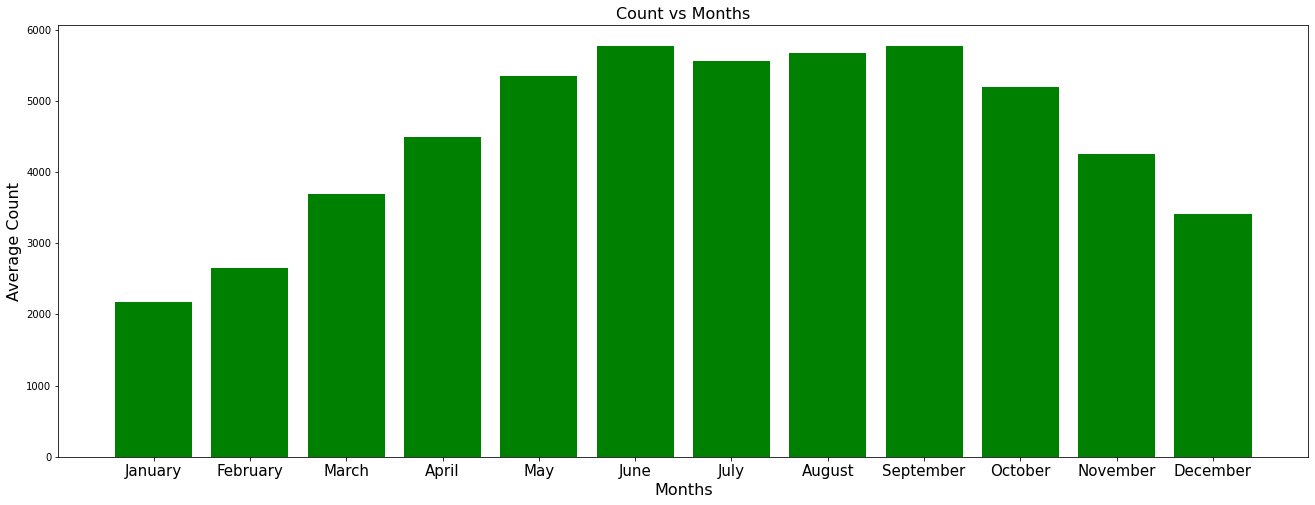

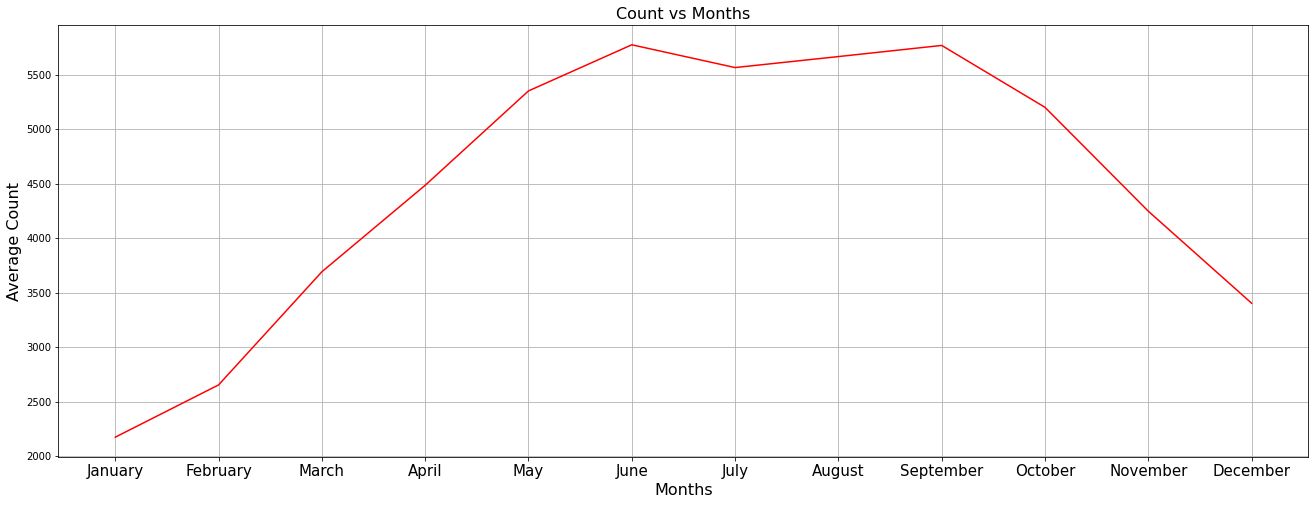

In [ ]:
m=[0,0,0,0,0,0,0,0,0,0,0,0]
c=[0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(df_copy.shape[0]):
  m[df_copy["mnth"][i]-1] += df_copy['cnt'][i]
  c[df_copy["mnth"][i]-1] += 1
for i in range(len(m)):
  m[i] = m[i]/c[i]
mos=['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
mydpi=72
fig1 = plt.figure(figsize=(1000/mydpi, 575.5/mydpi),dpi=mydpi)
axe = fig1.add_axes([0,0,1.25,0.75])
#axe.grid()
plt.setp(axe.get_xticklabels(), Fontsize=15)
plt.bar(mos,m, color='green')
plt.ylabel("Average Count",fontdict={'fontsize':16})
plt.xlabel("Months",fontdict={'fontsize':16})
plt.title("Count vs Months",fontdict={'fontsize':16})

plt.show()

fig2 = plt.figure(figsize=(1000/mydpi, 575.5/mydpi),dpi=mydpi)
axe2 = fig2.add_axes([0,0,1.25,0.75])
axe2.grid()
plt.setp(axe2.get_xticklabels(), Fontsize=15)
plt.plot(mos,m, color='red')
plt.ylabel("Average Count",fontdict={'fontsize':16})
plt.xlabel("Months",fontdict={'fontsize':16})
plt.title("Count vs Months",fontdict={'fontsize':16})

plt.show()


#### Months vs mean of the count graph

Both graphs matches with the information presented in weather and seasons. One interesting thing to note here is that during the month of july, bike sharing rate slightly dropped. This occurence matches with the inference collected from temperature and humidity graphs. Thus, the slight drop in july might be stemming from the effects of those factors.

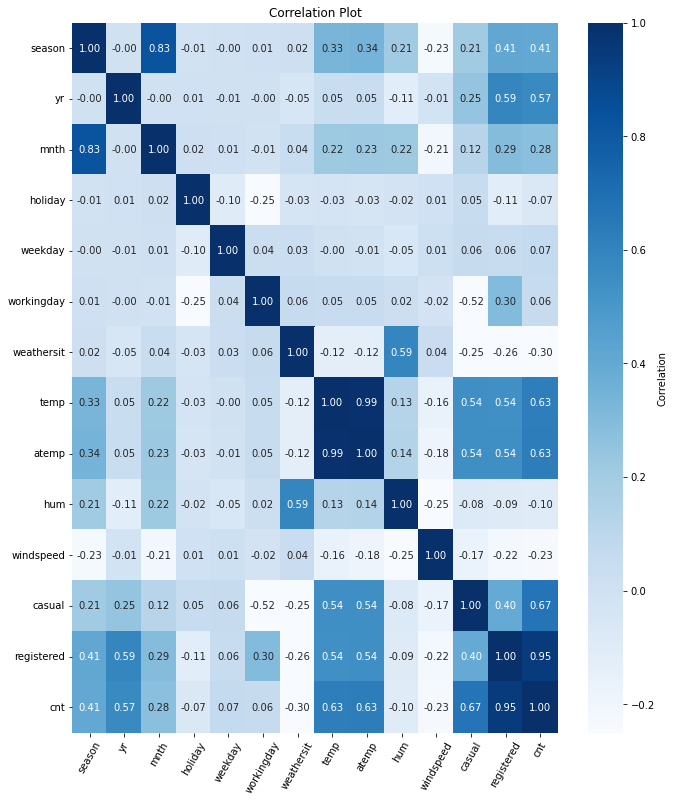

In [ ]:
newDF = df_copy.iloc[0:(df_copy.shape[0]), 0:16]
newDF.drop(["instant"], axis=1, inplace=True)
df_corr = newDF.corr()

plt.title("Correlation Plot")
sns.heatmap(df_corr, annot= True, cmap="Blues", vmin=-0.25, vmax=1.0, fmt = '.2f')
plt.xticks(rotation=60)
plt.ylabel('Correlation', labelpad=-660)
plt.tight_layout(-25)

plt.show()

#### Correlation graph of all columns with each other (bottom line is for comparing count with other columns)

Correlation graph shows that bike rentals positively correspond with temperature, season, humidity as also shown in the previous graphs and negatively corresponded with windspeed humidity as shown in other graphs once again.

Furthermore, interesting correspondences can be seen in the matrix. For example, season affected casual bike riders less than overall and even though there is an increase per year in bike rentals, this increase did not happen in the sphere of casual bike users. Also, working days and casual riders negatively affected each other which naturally indicates that people are less likely to use bikes as a mean of leisure during working days.  

## Data Exploration

In the "Utilized Datasets" section of our report, we have created graphs from various data we have to see which factors influence bike rental rates the most. Since our project aims to optimize the profits of bike renting services, this exploration of data is important to implement the most accurate prediction algorithm in the following sections. However, making judgements and comments on our data based solely on created graphs may mislead us to consider unrelated factors to be important. To prevent this, we will be utilizing hypothesis tests to data we have deemed to be related to bike rental rates to confirm our suspicions.

In the previous section, we have created a box graph for different seasons to see their respective rental rates. We have suggested that some seasons had higher rental rates by interpreting said graph, deducing that seasons affect bike rental rates. We will be doing an hypothesis test to confirm our deduction.

**Null Hypothesis:** Means of seasonal bike rental rates are not significant to overall bike rental rates.

**Alternative Hypothesis:** Means of seasonal bike rental rates are significant to overall bike rental rates.

In most cases, the level of significance is accepted as 0.05 so we're using the same value as well for our hypothesis tests.

In [ ]:
#We will be doing an ANOVA test since we have more than 2 groups of means to compare to 
count = 'cnt'
winter = df[df['season'] == 1][count]
spring = df[df['season'] == 2][count]
summer = df[df['season'] == 3][count]
fall = df[df['season'] == 4][count]

fvalue, pvalue = stats.f_oneway(winter,spring,summer,fall)
print("p-value is",pvalue)

#Check to see if pvalue is significant
level_of_significance = 0.05
if (pvalue <= level_of_significance):
  print("We reject the Null Hypothesis.")
  print("Seasons are significant to bike rental rates.")
else:
  print("We reject the Alternative Hypothesis.")
  print("Seasons are not significant to bike rental rates.")

p-value is 6.720391362913176e-67
We reject the Null Hypothesis.
Seasons are significant to bike rental rates.


In the previous section, we have created a violin plot to see the difference in rental rates between holidays and non-holidays. We have suggested that there were different attitudes in both groups, deducing that holidays could be affecting rental rates. We will be doing an hypothesis test to confirm our deduction.

**Null Hypothesis:** Means of holiday rental rates are not significant to overall bike rental rates.

**Alternative Hypothesis:** Means of holiday rental rates are significant to overall bike rental rates.

In [ ]:
holiday = df[df['holiday'] == 1][count]
day = df[df['holiday'] == 0][count]

#t-test to compare two different group means
tstat, pvalue = stats.ttest_ind(holiday,day)
print("p-value is","{:.3f}".format(pvalue))

#Check to see if p-value is significant
if (pvalue <= level_of_significance):
  print("We reject the Null Hypothesis.")
  print("Holidays are significant to bike rental rates.")
else:
  print("We reject the Alternative Hypothesis.")
  print("Holidays are not significant to bike rental rates.")

p-value is 0.065
We reject the Alternative Hypothesis.
Holidays are not significant to bike rental rates.


It is interesting to note that while the graphs suggest that holidays affect bike rental rates and the p-value is small, it is not significant to implement in our algorithm.

We have established with a box graph that different days of the week do not affect bike rental rates. We will be doing an hypothesis test by comparing weekend rental rates to weekday rental rates to confirm our findings.

**Null Hypothesis:** Means of weekend rental rates are not significant to overall bike rental rates.

**Alternative Hypothesis:** Means of weekend rental rates are significant to overall bike rental rates.

In [ ]:
weekday = df[df['weekday'] < 5][count]
weekend = df[df['weekday'] >= 5][count]

#t-test to compare two different group means
tstat, pvalue = stats.ttest_ind(weekend,weekday)
print("p-value is","{:.3f}".format(pvalue))

#Check to see if p-value is significant
if (pvalue <= level_of_significance):
  print("We reject the Null Hypothesis.")
  print("Weekends are significant to bike rental rates.")
else:
  print("We reject the Alternative Hypothesis.")
  print("Weekends are not significant to bike rental rates.")

p-value is 0.307
We reject the Alternative Hypothesis.
Weekends are not significant to bike rental rates.


We have confirmed that neither weekdays nor holidays affect bike rentals significantly but the violin graph we have plotted previously on working days and non-working days suggest a possible difference on rental rates.

**Null Hypothesis:** Means of non-working bike rental rates are not significant to overall bike rental rates.

**Alternative Hypothesis:** Means of non-working bike rental rates are significant to overall bike rental rates.

In [ ]:
workday = df[df['workingday'] == 1][count]
vacday = df[df['workingday'] == 0][count]

#t-test to compare two different group means
tstat, pvalue = stats.ttest_ind(workday,vacday)
print("p-value is","{:.3f}".format(pvalue))

#Check to see if p-value is significant
if (pvalue <= level_of_significance):
  print("We reject the Null Hypothesis.")
  print("Non-working days are significant to bike rental rates.")
else:
  print("We reject the Alternative Hypothesis.")
  print("Non-working days are not significant to bike rental rates.")

p-value is 0.098
We reject the Alternative Hypothesis.
Non-working days are not significant to bike rental rates.


In the previous section, we have established from a graph that weather situation is an important factor when it comes to bike rentals. We will be doing an hypothesis test to confirm our deduction.

For this test we have used the "day.csv" file so there were no data on days that had heavy blizzard/storm but since we're trying to find out whether weather in general affects rental rates, this should not be a problem.

**Null Hypothesis:** The means of rental rates on different weather situations are not significant to overall rental rates.

**Alternative Hypothesis:** The means of rental rates on different weather situations are significant to overall rental rates.

In [ ]:
clearday = df[df['weathersit'] == 1][count]
mistday = df[df['weathersit'] == 2][count]
lightday = df[df['weathersit'] == 3][count]

#ANOVA test to see if groups have the same population mean
fvalue, pvalue = stats.f_oneway(clearday,mistday,lightday)
print("p-value is",pvalue)

#Check to see if pvalue is significant
level_of_significance = 0.05
if (pvalue <= level_of_significance):
  print("We reject the Null Hypothesis.")
  print("Weather situations are significant to bike rental rates.")
else:
  print("We reject the Alternative Hypothesis.")
  print("Weather situations are not significant to bike rental rates.")

p-value is 3.106317270053755e-17
We reject the Null Hypothesis.
Weather situations are significant to bike rental rates.


For temperature, we will first find the real temperature of a day by using the formula given to us in the data file; then we will graph a histogram to see the bike rental rates. We will separate the groups into three intervals: Between 0-15 °C, 15-25 °C and 25-40 °C.

**Null Hypothesis:** The means of rental rates on different temperatures are not significant to overall bike rental rates.

**Alternative Hypothesis:** The means of rental rates on different temperatures are significant to overall bike rental rates.

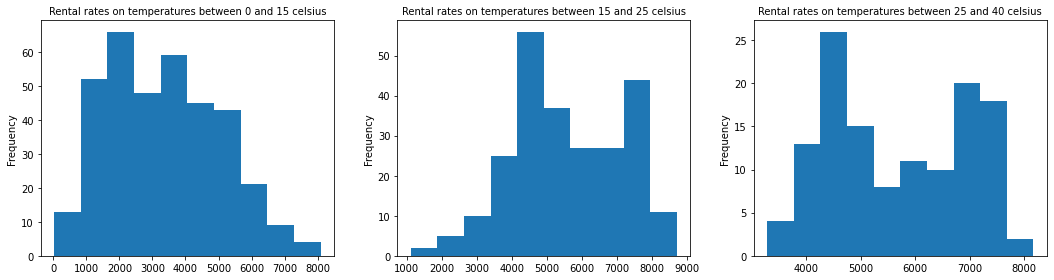


The graph suggests that there's a possible difference on bike rental rates depending on temperature.


In [ ]:
_max = 39
_min = -8
df_copy = df.copy()
df_copy['temp_real'] = (_max - _min) * df_copy.temp + _min

def assign_to_interval(num):
  if (num < 15):
    return "cold"
  elif (num >= 15 and num < 25):
    return "warm"
  elif (num >= 25):
    return "hot"

df_copy['temp_cat'] = df_copy['temp_real'].apply(assign_to_interval)

coldday = df_copy[df_copy['temp_cat'] == 'cold'][count]
warmday = df_copy[df_copy['temp_cat'] == 'warm'][count]
hotday = df_copy[df_copy['temp_cat'] == 'hot'][count]

fig, ax = plt.subplots(1,3, figsize=(15,4))

coldday.plot(kind='hist',ax=ax[0])
ax[0].set_title("Rental rates on temperatures between 0 and 15 celsius",fontsize=10)

warmday.plot(kind='hist',ax=ax[1])
ax[1].set_title("Rental rates on temperatures between 15 and 25 celsius",fontsize=10)

hotday.plot(kind='hist',ax=ax[2])
ax[2].set_title("Rental rates on temperatures between 25 and 40 celsius",fontsize=10)

plt.tight_layout()
plt.show()

print("\nThe graph suggests that there's a possible difference on bike rental rates depending on temperature.")

In [ ]:
#ANOVA test to see if groups have the same population mean
fvalue, pvalue = stats.f_oneway(coldday,warmday,hotday)
print("p-value is",pvalue)

#Check to see if pvalue is significant
level_of_significance = 0.05
if (pvalue <= level_of_significance):
  print("We reject the Null Hypothesis.")
  print("Temperature levels are significant to bike rental rates.")
else:
  print("We reject the Alternative Hypothesis.")
  print("Temperature levels are not significant to bike rental rates.")

p-value is 5.56272285697039e-66
We reject the Null Hypothesis.
Temperature levels are significant to bike rental rates.


We will take the same steps to find and compare the real feeling temperatures and their respective bike rental rates.

**Null Hypothesis:** The means of rental rates on different feeling temperatures are not significant to overall bike rental rates.

**Alternative Hypothesis:** The means of rental rates on different feeling temperatures are significant to overall bike rental rates.

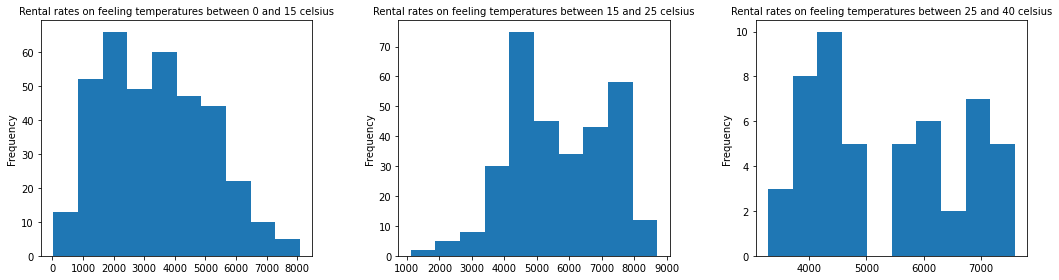


The graph suggests that there's a possible difference on bike rental rates depending on feeling temperature.


In [ ]:
_max = 39
_min = -8
df_copy = df.copy()
df_copy['atemp_real'] = (_max - _min) * df_copy.atemp + _min

df_copy['atemp_cat'] = df_copy['atemp_real'].apply(assign_to_interval)

coldday_feel = df_copy[df_copy['atemp_cat'] == 'cold'][count]
warmday_feel = df_copy[df_copy['atemp_cat'] == 'warm'][count]
hotday_feel = df_copy[df_copy['atemp_cat'] == 'hot'][count]

fig, ax = plt.subplots(1,3, figsize=(15,4))

coldday_feel.plot(kind='hist',ax=ax[0])
ax[0].set_title("Rental rates on feeling temperatures between 0 and 15 celsius",fontsize=10)

warmday_feel.plot(kind='hist',ax=ax[1])
ax[1].set_title("Rental rates on feeling temperatures between 15 and 25 celsius",fontsize=10)

hotday_feel.plot(kind='hist',ax=ax[2])
ax[2].set_title("Rental rates on feeling temperatures between 25 and 40 celsius",fontsize=10)

plt.tight_layout()
plt.show()

print("\nThe graph suggests that there's a possible difference on bike rental rates depending on feeling temperature.")

In [ ]:
#ANOVA test to see if groups have the same population mean
fvalue, pvalue = stats.f_oneway(coldday_feel,warmday_feel,hotday_feel)
print("p-value is",pvalue)

#Check to see if pvalue is significant
level_of_significance = 0.05
if (pvalue <= level_of_significance):
  print("We reject the Null Hypothesis.")
  print("Feeling temperature levels are significant to bike rental rates.")
else:
  print("We reject the Alternative Hypothesis.")
  print("Feeling temperature levels are not significant to bike rental rates.")

p-value is 3.487702642994788e-64
We reject the Null Hypothesis.
Feeling temperature levels are significant to bike rental rates.


We have previously established that increased humidity caused fewer bike rental rates. We will test to prove our suggestion that humidity affects rental rates by comparing the rates on less humid days to more humid days.

**Null Hypothesis:** The means of rental rates on different humidities are not significant to overall bike rental rates.

**Alternative Hypothesis:** The means of rental rates on different humidities are significant to overall bike rental rates.

In [ ]:
df_copy = df.copy()
df_copy['hum_real'] = 100 * df_copy.hum
hum_mean = df_copy['hum_real'].mean()

def assign_humidity(num):
  if (num <= hum_mean):
    return "low"
  elif (num > hum_mean):
    return "high"

df_copy['hum_cat'] = df_copy['hum_real'].apply(assign_humidity)

high_hum = df_copy[df_copy['hum_cat'] == "high"][count]
low_hum = df_copy[df_copy['hum_cat'] == "low"][count]

#t-test to compare two different group means
tstat, pvalue = stats.ttest_ind(low_hum,high_hum)
print("p-value is","{:.3f}".format(pvalue))

#Check to see if p-value is significant
if (pvalue <= level_of_significance):
  print("We reject the Null Hypothesis.")
  print("Humidity is significant to bike rental rates.")
else:
  print("We reject the Alternative Hypothesis.")
  print("Humidity is not significant to bike rental rates.")

p-value is 0.096
We reject the Alternative Hypothesis.
Humidity is not significant to bike rental rates.


Even though increased humidity suggests lower rental rates in our previous graph, it is not significant to implement in our algorithm.

We have suggested in our previous graph that higher wind speed caused fewer rental rates. We will test to see whether wind speed actually is an important factor in bike rental rates by comparing the rates on windy days to calmer days.

**Null Hypothesis:** The means of rental rates on different wind speeds are not significant to overall bike rental rates.

**Alternative Hypothesis:** The means of rental rates on different wind speeds are significant to overall bike rental rates.

In [ ]:
df_copy = df.copy()
df_copy['wind_real'] = 67 * df_copy.windspeed
wind_mean = df_copy['wind_real'].mean()

def assign_wind(num):
  if (num <= wind_mean):
    return "low"
  elif (num > wind_mean):
    return "high"

df_copy['wind_cat'] = df_copy['wind_real'].apply(assign_wind)

high_wind = df_copy[df_copy['wind_cat'] == "high"][count]
low_wind = df_copy[df_copy['wind_cat'] == "low"][count]

#t-test to compare two different group means
tstat, pvalue = stats.ttest_ind(low_wind,high_wind)
print("p-value is",pvalue)

#Check to see if p-value is significant
if (pvalue <= level_of_significance):
  print("We reject the Null Hypothesis.")
  print("Wind speed is significant to bike rental rates.")
else:
  print("We reject the Alternative Hypothesis.")
  print("Wind speed is not significant to bike rental rates.")

p-value is 6.036898755352905e-09
We reject the Null Hypothesis.
Wind speed is significant to bike rental rates.


**In conclusion:** Thanks to our hypothesis tests we have confirmed that seasons, temperature, feeling temperature, weather situations and wind speed are important factors that affect bike rental rates on a given day while holidays, weekdays, working days and humidity are not significant enough to affect bike rental rates. It is important to note that while these factors do have an effect on rental rates, they are not significant enough compared to other factors.

## Machine Learning Models

In our project, we want to predict the total number of rentings by using seasonal information, date, and weather information.
	
We tried the k-nearest neighbor algorithm, decision trees, random forest, ensemble, polynomial regression, and linear regression. 

We aimed to find which model has the most accurate results for count values for predicting the future bike rentals.


### Implementation


In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1.01.2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2.01.2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,3.01.2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,4.01.2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,5.01.2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Drop the casual and registered columns to avoid biased results
# Index column is also unnecessary
df.dropna()
df = df.drop(columns=['instant', 'casual', 'registered'])
# Date column is unnecessary because yr mnth columns contains the same informations
df = df.drop(columns="dteday")

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
from sklearn.model_selection import train_test_split

# Extract features and labels from the data
labels = df['cnt'].to_numpy()
features_df = df.drop(columns='cnt')
features = features_df.to_numpy()

# 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.20)


We divide the dataset to labels and features matrices. Features contains every numerical column except the cnt column. Labels contain only the cnt column.

##KNN 

mean_squared_error for 1 : 1280734.2585034014
mean_squared_error for 2 : 820735.4727891156
mean_squared_error for 3 : 673039.1889644747
mean_squared_error for 4 : 603700.5008503401
mean_squared_error for 5 : 571603.2176870748
mean_squared_error for 6 : 583705.0272108844
mean_squared_error for 7 : 596046.4943773429
mean_squared_error for 8 : 562595.9026360544
mean_squared_error for 9 : 627501.426723776
mean_squared_error for 10 : 685688.2896598638
mean_squared_error for 11 : 701705.2143700456
mean_squared_error for 12 : 712607.3452380953
mean_squared_error for 13 : 723879.7664130741
mean_squared_error for 14 : 737708.0512980703
mean_squared_error for 15 : 751345.2529100529
mean_squared_error for 16 : 756599.8895355017
mean_squared_error for 17 : 778530.5290586823
mean_squared_error for 18 : 794340.1893214077
mean_squared_error for 19 : 848063.3565492679
mean_squared_error for 20 : 869719.5082993198
lowest error at k=  8, being 562595.9026360544


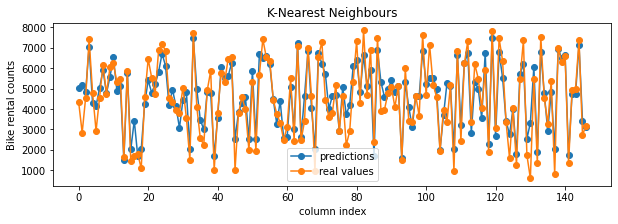

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# set the hyperparameter k
list1=[]
for k in range(1,21):
  model = KNeighborsRegressor(k)
  model.fit(x_train, y_train)
  y_pred_knn = model.predict(x_test)
  a = float(mean_squared_error(y_test, y_pred_knn))
  list1.append(a)
  print("mean_squared_error for",k,":", a)
  
print("lowest error at k= ",str(list1.index(min(list1))+1)+", being",min(list1))
model = KNeighborsRegressor(list1.index(min(list1))+1)
model.fit(x_train, y_train)
y_pred_knn = model.predict(x_test)
plt.figure(figsize=(10,3))
plt.plot([i for i in range(len(y_pred_knn))], y_pred_knn, "-o", label="predictions")
plt.plot([i for i in range(len(y_test))], y_test, "-o", label="real values")
plt.ylabel("Bike rental counts")
plt.xlabel("column index")
plt.title("K-Nearest Neighbours")
plt.legend()
plt.show()

Explained variance score: 0.8511226121303677
Mean squared error: 562595.9026360544
Mean squared error (On training set): 758255.3430543664
Root mean square error (Gives a real number value. Smaller is better): 750.0639323658047
R-square (Ranges between -1 and 1. Closer to 1 is better): 0.846515167600493
Cross-validation scores: [ -857950.24732906 -1084573.11418269 -1494771.25413996 -1288230.15211004
  -964561.95043103]
Cross-validation scores average: -1138017.3436385572


-1138017.3436385572

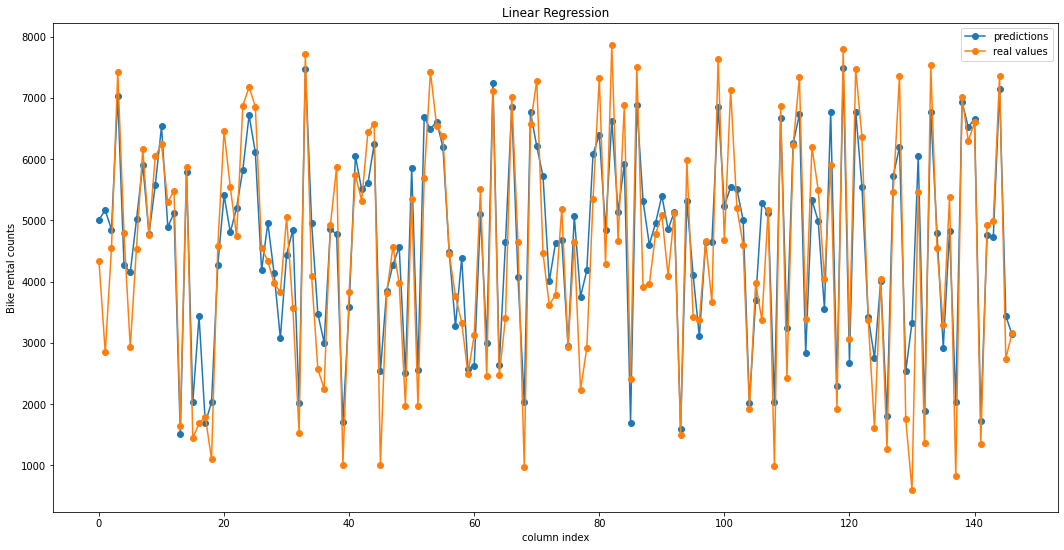

In [ ]:
eval_model(model, x_train, y_train, x_test, y_test, show_graph=True)

We implemented knn and we found lowest mean square error for knn model with using hyperparameter k between 1 and 20. We observed that knn model is unstable and changes every time it is trained.

##Decision Tree

In [ ]:
# Decision tree

from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train, y_train)
y_pred_tree = clf.predict(x_test)

# Round the float predictions to integer values
y_pred_tree = np.rint(y_pred_tree)

Explained variance score: 0.7758329965912185
Mean squared error: 923790.4285714285


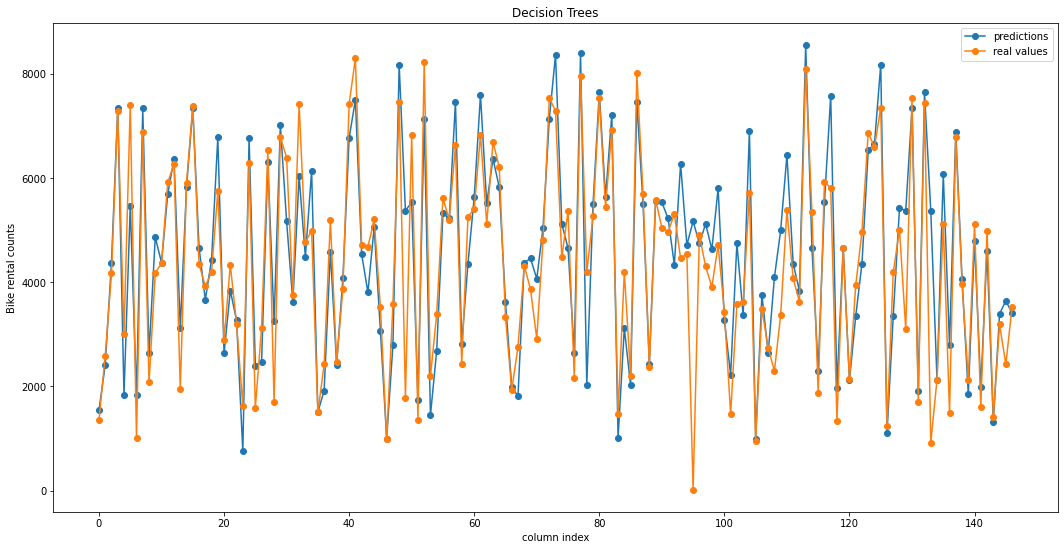

In [ ]:
#Decision tree
from sklearn.metrics import explained_variance_score

plt.figure(figsize=(18,9))
plt.plot([i for i in range(len(y_pred_tree))], y_pred_tree, "-o", label="predictions")
plt.plot([i for i in range(len(y_test))], y_test, "-o", label="real values")
plt.legend()
plt.ylabel("Bike rental counts")
plt.xlabel("column index")
plt.title("Decision Trees")

print("Explained variance score:", explained_variance_score(y_test, y_pred_tree))
print("Mean squared error:", mean_squared_error(y_test, y_pred_tree))

We implemented decision tree regressor and we found mean square error for our decision tree model.

### Linear Regression Model

In [ ]:
def eval_model(model, X_train, y_train, X_test, y_test, show_output=True, show_graph=False):
  # Returns cross validation neg_mean_squared_error value with train set. Also prints results with test set.
  from sklearn.metrics import explained_variance_score
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  from sklearn.model_selection import cross_val_score

  neg_mean_squared_errors = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  if show_output:
    if show_graph:
      plt.figure(figsize=(18,9))
      plt.plot([i for i in range(len(y_pred))], y_pred, "-o", label="predictions")
      plt.plot([i for i in range(len(y_test))], y_test, "-o", label="real values")
      plt.legend()
      plt.ylabel("Bike rental counts")
      plt.xlabel("column index")
      plt.title("Linear Regression")

    print("Explained variance score:", explained_variance_score(y_test, y_pred))
    print("Mean squared error:", mean_squared_error(y_test, y_pred))
    print("Mean squared error (On training set):", mean_squared_error(y_train, y_pred_train))
    print("Root mean square error (Gives a real number value. Smaller is better):", mean_squared_error(y_test, y_pred, squared=False))
    print("R-square (Ranges between -1 and 1. Closer to 1 is better):", r2_score(y_test, y_pred))
    print("Cross-validation scores:", neg_mean_squared_errors)
    print("Cross-validation scores average:", sum(neg_mean_squared_errors) / len(neg_mean_squared_errors))

  return sum(neg_mean_squared_errors) / len(neg_mean_squared_errors)

In [ ]:
from sklearn.model_selection import train_test_split

# Extract features and labels from the data
labels = df['cnt'].to_numpy()
features_df = df.drop(columns='cnt')
features = features_df.to_numpy()

#80 train, 20 test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42)


Explained variance score: 0.8278093637116661
Mean squared error: 691035.0082022651
Mean squared error (On training set): 765819.3608176153
Root mean square error (Gives a real number value. Smaller is better): 831.2851545662686
R-square (Ranges between -1 and 1. Closer to 1 is better): 0.8276670090367212
Cross-validation scores: [ -862921.16192395  -659874.08003662  -941852.05731723 -1050147.18392436
  -602990.52322471]
Cross-validation scores average: -823557.001285377


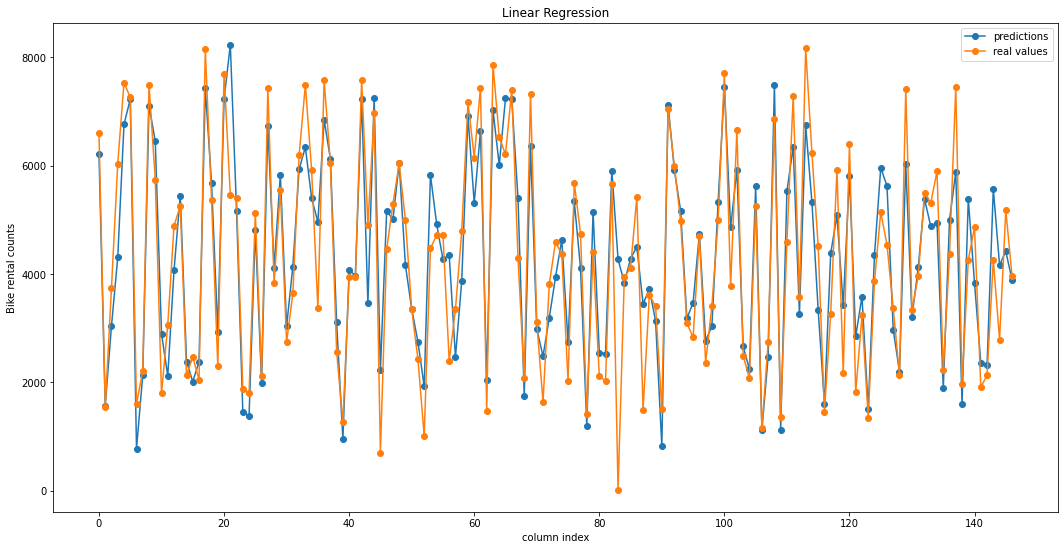

In [ ]:
# linear regression default model

from sklearn.linear_model import LinearRegression

base_model = LinearRegression()
base_model.fit(X_train, y_train)

# Round the float predictions to integer values
#y_pred_lr = np.rint(y_pred_lr)

base_score = eval_model(base_model, X_train, y_train, X_test, y_test, show_graph=True)

In [ ]:
# Decide which feautures decrease the cross validation mean square error value.
# If it drops this value add it to unimportant labels list.
unimportant_labels = []
for i in df.columns[:-1]:
  # Extract features and labels from the data
  temp_df = df.drop(columns=[i])
  labels_temp = temp_df['cnt'].to_numpy()
  features_df_temp = temp_df.drop(columns='cnt')
  features_temp = features_df_temp.to_numpy()
  #85 train, 15 test
  X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(features_temp, labels_temp, test_size=0.15, random_state=42)
  temp_model = LinearRegression()
  temp_model.fit(X_train_temp, y_train_temp)
  print("Column name:", i)
  print(temp_df.head())
  y_pred_temp = temp_model.predict(X_train_temp)
  temp_score = eval_model(temp_model, X_train_temp, y_train_temp, X_test_temp, y_test_temp, show_output=True)
  print("\n\n")
  if temp_score > base_score:
    unimportant_labels.append(i)


Column name: season
   yr  mnth  holiday  weekday  ...     atemp       hum  windspeed   cnt
0   0     1        0        6  ...  0.363625  0.805833   0.160446   985
1   0     1        0        0  ...  0.353739  0.696087   0.248539   801
2   0     1        0        1  ...  0.189405  0.437273   0.248309  1349
3   0     1        0        2  ...  0.212122  0.590435   0.160296  1562
4   0     1        0        3  ...  0.229270  0.436957   0.186900  1600

[5 rows x 11 columns]
Explained variance score: 0.8079323740281474
Mean squared error: 829613.5251689022
Mean squared error (On training set): 844661.0961017162
Root mean square error (Gives a real number value. Smaller is better): 910.8312275986711
R-square (Ranges between -1 and 1. Closer to 1 is better): 0.805337695985279
Cross-validation scores: [ -872134.3409337  -1011510.28968918  -950908.16890699  -976144.11500707
  -729974.60584236]
Cross-validation scores average: -908134.3040758598



Column name: yr
   season  mnth  holiday  weekd

In [ ]:
unimportant_labels

['mnth', 'holiday', 'workingday', 'temp', 'atemp', 'hum']

In [ ]:
df_dropped = df.drop(columns=unimportant_labels)

labels_dropped = df_dropped['cnt'].to_numpy()
features_df_dropped = df_dropped.drop(columns='cnt')
features_dropped = features_df_dropped.to_numpy()

#80 train, 20 test
X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(features_dropped, labels_dropped, test_size=0.20, random_state=42)

dropped_model = LinearRegression()
dropped_model.fit(X_train_dropped, y_train_dropped)

dropped_score = eval_model(dropped_model, X_train_dropped, y_train_dropped, X_test_dropped, y_test_dropped)

Explained variance score: 0.6151440908238484
Mean squared error: 1563242.369786964
Mean squared error (On training set): 1548940.193705894
Root mean square error (Gives a real number value. Smaller is better): 1250.2969126519365
R-square (Ranges between -1 and 1. Closer to 1 is better): 0.6101525537949897
Cross-validation scores: [-1296494.76597617 -1376336.59405247 -2020857.85899873 -1841731.068758
 -1411821.04052836]
Cross-validation scores average: -1589448.2656627465


### Result: Dropping all of the least effective features caused overfitting. We will keep all the features except "hum" column. We tried by hand decided to drop only the "hum" column.

Explained variance score: 0.822287248528507
Mean squared error: 712801.262081719
Mean squared error (On training set): 773799.2069537097
Root mean square error (Gives a real number value. Smaller is better): 844.275584203238
R-square (Ranges between -1 and 1. Closer to 1 is better): 0.8222388562100349
Cross-validation scores: [ -829203.01637064  -669928.07325706  -965157.86954821 -1028829.38656556
  -618150.61111202]
Cross-validation scores average: -822253.7913706976


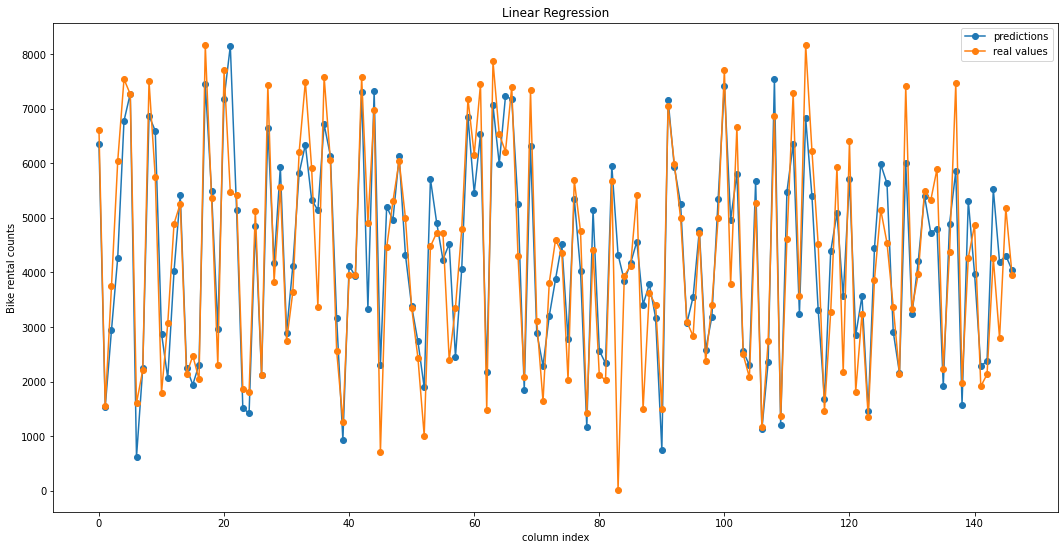

In [ ]:
df_dropped = df.drop(columns=["hum"])

labels_dropped = df_dropped['cnt'].to_numpy()
features_df_dropped = df_dropped.drop(columns='cnt')
features_dropped = features_df_dropped.to_numpy()

#80 train, 20 test

X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(features_dropped, labels_dropped, test_size=0.20, random_state=42)

dropped_model = LinearRegression()
dropped_model.fit(X_train_dropped, y_train_dropped)

dropped_score = eval_model(dropped_model, X_train_dropped, y_train_dropped, X_test_dropped, y_test_dropped, show_graph=True)

We implemented linear regression model and we found different mean square errors with dropping least effective columns.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

In [ ]:
X_train.shape

(584, 11)

In [ ]:
X_poly.shape

(584, 78)

Explained variance score: 0.7945610885223806
Mean squared error: 823795.062662055
Mean squared error (On training set): 355244.4734520648
Root mean square error (Gives a real number value. Smaller is better): 907.6315676870516
R-square (Ranges between -1 and 1. Closer to 1 is better): 0.7945587916614204
Cross-validation scores: [-1658144.13398837  -613207.42844736  -746571.69074091  -740830.78144295
 -1033525.17416475]
Cross-validation scores average: -958455.8417568716


-958455.8417568716

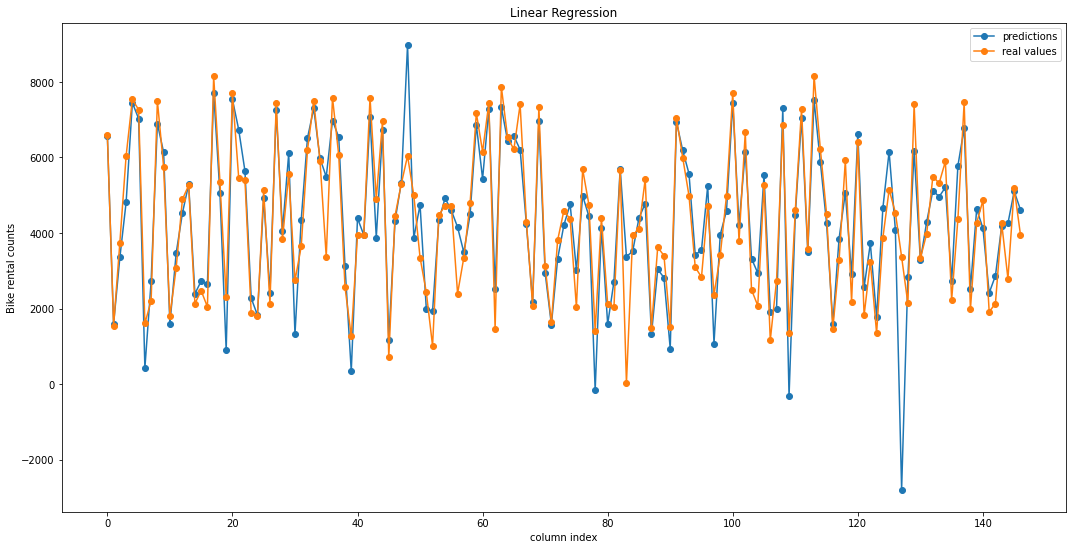

In [ ]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

y_pred_lr_poly = lin_reg_2.predict(X_poly)
eval_model(lin_reg_2, X_poly, y_train, X_test_poly, y_test, show_output=True, show_graph=True)

Using polynomials also causes overfitting because our dataset contains very few samples. We get 355244.4734520648 mean squared error on training set whereas 823795.062662055 mean squared error on the test set. This is a strong sign of an overfitting. We will continue with non-polynomial linear regression.

Explained variance score: 0.822287248528507
Mean squared error: 712801.262081719
Mean squared error (On training set): 773799.2069537097
Root mean square error (Gives a real number value. Smaller is better): 844.275584203238
R-square (Ranges between -1 and 1. Closer to 1 is better): 0.8222388562100349
Cross-validation scores: [ -829203.01637064  -669928.07325706  -965157.86954821 -1028829.38656556
  -618150.61111202]
Cross-validation scores average: -822253.7913706976


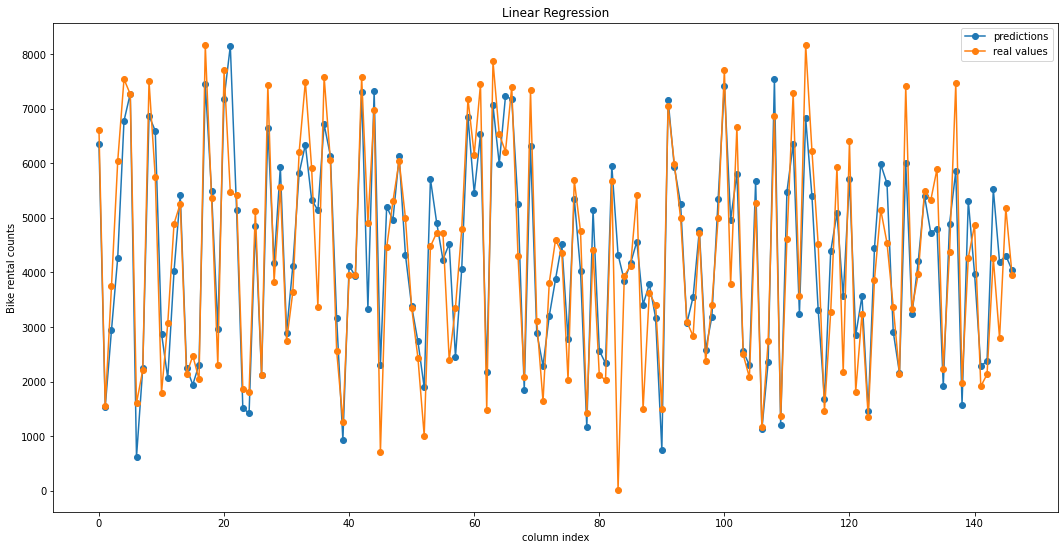

In [ ]:
df_final = df.drop(columns=["hum"])

labels_final = df_final['cnt'].to_numpy()
features_df_final = df_final.drop(columns='cnt')
features_final = features_df_final.to_numpy()

#80 train, 20 test
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(features_final, labels_final, test_size=0.20, random_state=42)

final_model = LinearRegression()
final_model.fit(X_train_final, y_train_final)

final_score = eval_model(final_model, X_train_final, y_train_final, X_test_final, y_test_final, show_graph=True)

#Random Forest Regression Model

In [ ]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
#RANDOM FOREST
#freeDF = df.drop(columns=['hum', 'workingday', 'weekday', 'holiday']) #droping non-important columns learned from hypothesis testing
freeDF = df.copy()
from sklearn.model_selection import train_test_split

# Extract features and labels from the data
labels2 = freeDF['cnt'].to_numpy()
features_df2 = freeDF.drop(columns='cnt')
features2 = features_df2.to_numpy()

# 80 train 20 test
x_train2, x_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size=0.20, random_state=42)
#x_test2, x_val2, y_test2, y_val2 = train_test_split(X_remaining2, y_remaining2, test_size=0.50, random_state=42)
#Cross Val to be applied


Hyperparameter tuning for random forest model

In [ ]:
#hyperaramter tuning
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


for i in range(1,11):
  myModel = RandomForestRegressor(n_estimators=50*i, random_state=42)
  #def
  print("\n\nn_estimators=", 50*i)
  eval_model(myModel, x_train2, y_train2, x_test2, y_test2, show_output=True, show_graph=False)
"""  myModel.fit(x_train2, y_train2)
  y_pred_tree2 = myModel.predict(x_val2)
  print("n_estimators=", 50*i , ": Mean squared error:", mean_squared_error(y_val2, y_pred_tree2))
  print("n_estimators=", 50*i , ": Mean absolute error:", mean_absolute_error(y_val2, y_pred_tree2), "\n")"""



n_estimators= 50
Explained variance score: 0.8859965068191599
Mean squared error: 458055.5889088435
Mean squared error (On training set): 66839.6799280822
Root mean square error (Gives a real number value. Smaller is better): 676.7980414487349
R-square (Ranges between -1 and 1. Closer to 1 is better): 0.8857683203786371
Cross-validation scores: [-325647.64468376 -558591.57980171 -754137.64132991 -604388.6919453
 -372786.0274931 ]
Cross-validation scores average: -523110.31705075747


n_estimators= 100
Explained variance score: 0.8858826566209554
Mean squared error: 458446.9475870749
Mean squared error (On training set): 64253.628892465764
Root mean square error (Gives a real number value. Smaller is better): 677.0871048743101
R-square (Ranges between -1 and 1. Closer to 1 is better): 0.8856707218333267
Cross-validation scores: [-334509.90083675 -535914.89976838 -759596.09024359 -593155.7154
 -371316.43344224]
Cross-validation scores average: -518898.60793819185


n_estimators= 150
Ex

'  myModel.fit(x_train2, y_train2)\n  y_pred_tree2 = myModel.predict(x_val2)\n  print("n_estimators=", 50*i , ": Mean squared error:", mean_squared_error(y_val2, y_pred_tree2))\n  print("n_estimators=", 50*i , ": Mean absolute error:", mean_absolute_error(y_val2, y_pred_tree2), "\n")'

In [ ]:
for i in range(15,26):
  myModel = RandomForestRegressor(n_estimators=10*i, random_state=42)
  #def
  print("\n\nn_estimators=", 10*i)
  eval_model(myModel, x_train2, y_train2, x_test2, y_test2, show_output=True, show_graph=False)
  """myModel.fit(x_train2, y_train2)
  y_pred_tree2 = myModel.predict(x_val2)
  print("n_estimators=", 10*i , ": Mean squared error:", mean_squared_error(y_val2, y_pred_tree2))
  print("n_estimators=", 10*i , ": Mean absolute error:", mean_absolute_error(y_val2, y_pred_tree2), "\n")"""



n_estimators= 150
Explained variance score: 0.8866906313041365
Mean squared error: 455191.5627543462
Mean squared error (On training set): 64757.95406133943
Root mean square error (Gives a real number value. Smaller is better): 674.6788589798455
R-square (Ranges between -1 and 1. Closer to 1 is better): 0.8864825623309885
Cross-validation scores: [-325932.01158632 -514368.50757493 -761637.86701425 -581113.98089611
 -376022.93842835]
Cross-validation scores average: -511815.0610999915


n_estimators= 160
Explained variance score: 0.8866223665803169
Mean squared error: 455456.5173068133
Mean squared error (On training set): 64720.37485826467
Root mean square error (Gives a real number value. Smaller is better): 674.8751864654777
R-square (Ranges between -1 and 1. Closer to 1 is better): 0.8864164869368999
Cross-validation scores: [-328815.54785624 -510850.41954193 -757511.03178385 -583005.61459802
 -377949.76277478]
Cross-validation scores average: -511626.4753109665


n_estimators= 17

n_estimators= 300 produces the minimum error with train-validation-test

n_estimators= 200 produces the minimum error with cross validation

n_estimators= 200 produces the minimum error with cross validation(w/o dropping)



In [ ]:
for i in range(1,12):
  myModel = RandomForestRegressor(max_features=i, random_state=42, n_estimators= 200)
  print("\n\nmax_features=", i)
  eval_model(myModel, x_train2, y_train2, x_test2, y_test2, show_output=True, show_graph=False)
  #def
  """y_pred_tree2 = myModel.predict(x_val2)
  print("max_features=", i , ": Mean squared error:", mean_squared_error(y_val2, y_pred_tree2))
  print("max_features=", i , ": Mean absolute error:", mean_absolute_error(y_val2, y_pred_tree2),  "\n")"""



max_features= 1
Explained variance score: 0.8397447102798851
Mean squared error: 652324.8561209184
Mean squared error (On training set): 76290.68612260272
Root mean square error (Gives a real number value. Smaller is better): 807.6663024547443
R-square (Ranges between -1 and 1. Closer to 1 is better): 0.8373206969246572
Cross-validation scores: [-528633.63390342 -553342.56972882 -753658.87278974 -602347.45037756
 -594888.53946573]
Cross-validation scores average: -606574.2132530564


max_features= 2
Explained variance score: 0.8763954592655148
Mean squared error: 499213.2501465986
Mean squared error (On training set): 64097.47981451198
Root mean square error (Gives a real number value. Smaller is better): 706.5502460169402
R-square (Ranges between -1 and 1. Closer to 1 is better): 0.8755042631630586
Cross-validation scores: [-431991.76300214 -498873.67682906 -603408.60982585 -521953.70066368
 -437256.41049806]
Cross-validation scores average: -498696.83216375735


max_features= 3
Exp

max_features= 7 produces the minimum error with train-validation-test


max_features= 2 produces the minimum error with cross validation

max_features= 8 produces the minimum error with cross validation(w/o dropping)

We found our hypereparameters as n_estimators=200 and max_features=8. Also we obted not to drop any columns.

Explained variance score: 0.8926395370017924
Mean squared error: 430790.5622088436
Mean squared error (On training set): 62645.40868249145
Root mean square error (Gives a real number value. Smaller is better): 656.3463736540666
R-square (Ranges between -1 and 1. Closer to 1 is better): 0.892567778501791
Cross-validation scores: [-351300.06185919 -508217.0907438  -725091.32389637 -545070.33756838
 -366838.48073858]
Cross-validation scores average: -499303.45896126254


Text(0.5, 1.0, 'Random forest')

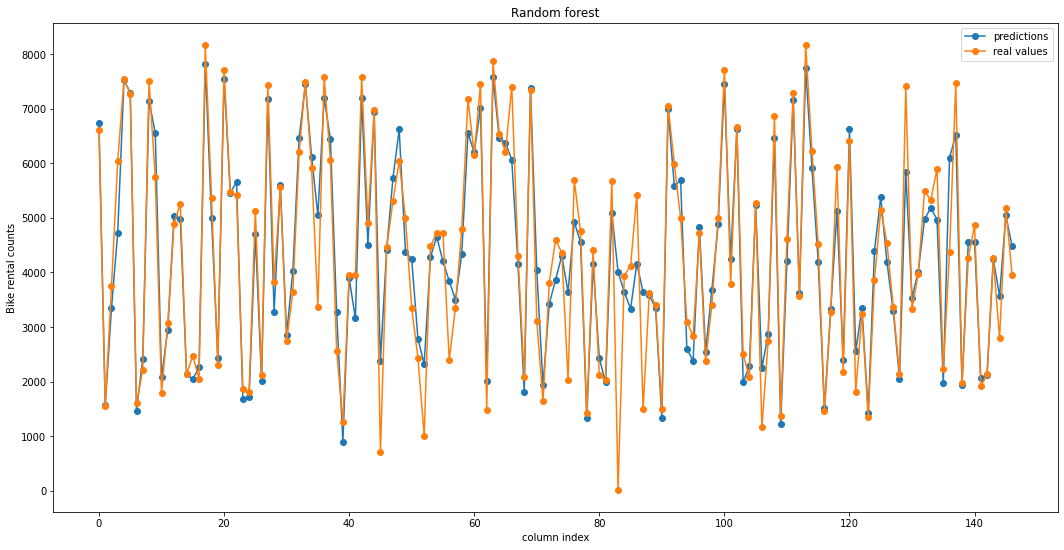

In [ ]:
#test time

myModel = RandomForestRegressor(n_estimators=200, random_state=42, max_features=8)
eval_model(myModel, x_train2, y_train2, x_test2, y_test2, show_output=True, show_graph=True)
"""myModel.fit(x_train2, y_train2)
myModel.score(x_test2, y_test2)
y_pred_tree2 = myModel.predict(x_test2)

plt.figure(figsize=(18,9))
plt.plot([i for i in range(len(y_pred_tree2))], y_pred_tree2, "-o", label="predictions")
plt.plot([i for i in range(len(y_test2))], y_test2, "-o", label="real values")
plt.legend()
plt.ylabel("Bike rental counts")
plt.xlabel("column index")
plt.title("Random forest")

print("Explained variance score:", explained_variance_score(y_test2, y_pred_tree2))
print("Mean squared error:", mean_squared_error(y_test2, y_pred_tree2))"""
plt.title("Random forest")

#Ensemble Learning

hyperparameter tuning for max_features
Explained variance score: 0.8389542428770738
Mean squared error: 652538.0026844294
Mean squared error (On training set): 80097.82410534627
Root mean square error (Gives a real number value. Smaller is better): 807.7982437988024
R-square (Ranges between -1 and 1. Closer to 1 is better): 0.8372675416078246
Cross-validation scores: [-542866.94572802 -584440.62639269 -733021.57849877 -596620.07393685
 -580006.3443658 ]
Cross-validation scores average: -607391.113784424
Explained variance score: 0.8701412832699827
Mean squared error: 524702.6261125471
Mean squared error (On training set): 66297.17630766743
Root mean square error (Gives a real number value. Smaller is better): 724.3636007645243
R-square (Ranges between -1 and 1. Closer to 1 is better): 0.8691476237079506
Cross-validation scores: [-429213.4698716  -473388.07859668 -599729.85120323 -516766.45765679
 -439257.52616015]
Cross-validation scores average: -491671.0766976906
Explained variance s

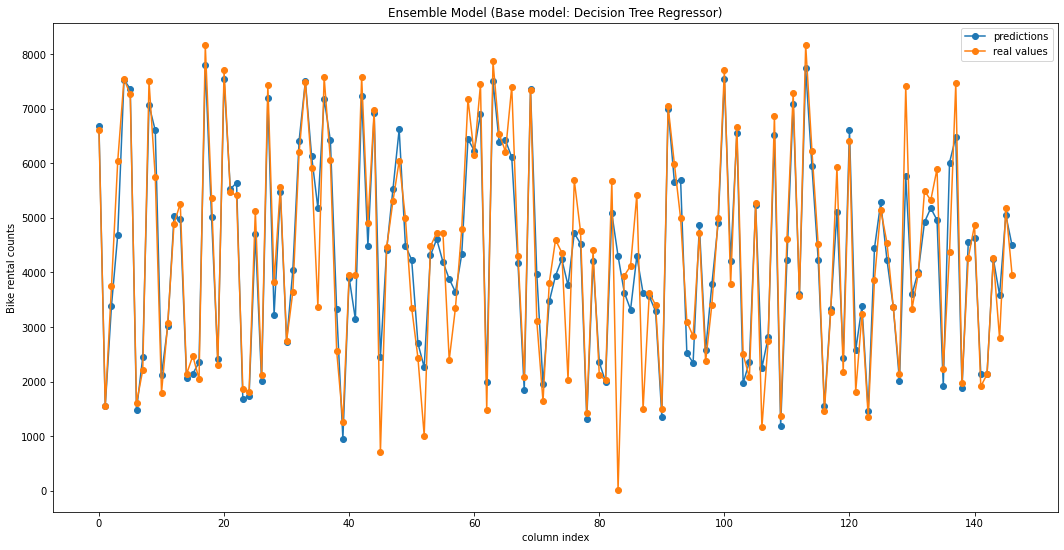

In [ ]:
#ensemble learning 
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor



print("hyperparameter tuning for max_features")
for i in range(1,8):
  ensemble_model = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(random_state=42, max_features=i),
    n_estimators=300,
    random_state=42
  )
  eval_model(ensemble_model, x_train2, y_train2, x_test2, y_test2, show_output=True, show_graph=False)
  #predictions = ensemble_model.predict(x_val)
  #print("max_features=", i , ": Mean squared error:", mean_squared_error(y_val2, predictions))
  #print("max_features=", i , ": Mean absolute error:", mean_absolute_error(y_val2, predictions),  "\n")

print("\nhyperparamter tuning for n_estimators")
for i in [10, 100, 200, 300]:
  ensemble_model = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(random_state=42, max_features=7),
    n_estimators=i,
    random_state=42
  )
  #ensemble_model.fit(x_train2, y_train2)
  #predictions = ensemble_model.predict(x_val2)
  eval_model(ensemble_model, x_train2, y_train2, x_test2, y_test2, show_output=True, show_graph=False)
  #print("max_features=", i , ": Mean squared error:", mean_squared_error(y_val2, predictions))
  #print("max_features=", i , ": Mean absolute error:", mean_absolute_error(y_val2, predictions),  "\n")

print("\nfinal evaluation with best parameters")
ensemble_model = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(random_state=42, max_features=7),
    n_estimators=300,
    random_state=42
)
ensemble_model.fit(x_train2, y_train2)
predictions = ensemble_model.predict(x_test2)
print("max_features=", i , ": Mean squared error:", mean_squared_error(y_test2, predictions))
print("max_features=", i , ": Mean absolute error:", mean_absolute_error(y_test2, predictions),  "\n")



plt.figure(figsize=(18,9))
plt.plot([i for i in range(len(predictions))], predictions, "-o", label="predictions")
plt.plot([i for i in range(len(y_test2))], y_test2, "-o", label="real values")
plt.legend()
plt.ylabel("Bike rental counts")
plt.xlabel("column index")
plt.title("Ensemble Model (Base model: Decision Tree Regressor)")

plt.show()

#print("Explained variance score:", explained_variance_score(y_test2, predictions))
#print("Mean squared error:", mean_squared_error(y_test2, predictions))

We tried also couple different regressor models used in the documentation of Scikitlearn library such as Epsilon-Support Vector Regressions and had significantly worse results compared to other machine learning models.


hyperparamter tuning for n_estimators
Explained variance score: 0.01566015810366006
Mean squared error: 4025675.1715569026
Mean squared error (On training set): 3603549.750193775
Root mean square error (Gives a real number value. Smaller is better): 2006.408525589169
R-square (Ranges between -1 and 1. Closer to 1 is better): -0.003938490418635476
Cross-validation scores: [-3673867.12292725 -3477285.61191969 -4029244.21525357 -3320895.85278461
 -3769049.49497397]
Cross-validation scores average: -3654068.4595718207
Explained variance score: 0.015912382297504468
Mean squared error: 4031107.6982739037
Mean squared error (On training set): 3602649.135984977
Root mean square error (Gives a real number value. Smaller is better): 2007.7618629394035
R-square (Ranges between -1 and 1. Closer to 1 is better): -0.005293275004823572
Cross-validation scores: [-3673752.17726829 -3481028.65215357 -4029126.70336942 -3313747.94161039
 -3769154.3589012 ]
Cross-validation scores average: -3653361.966660

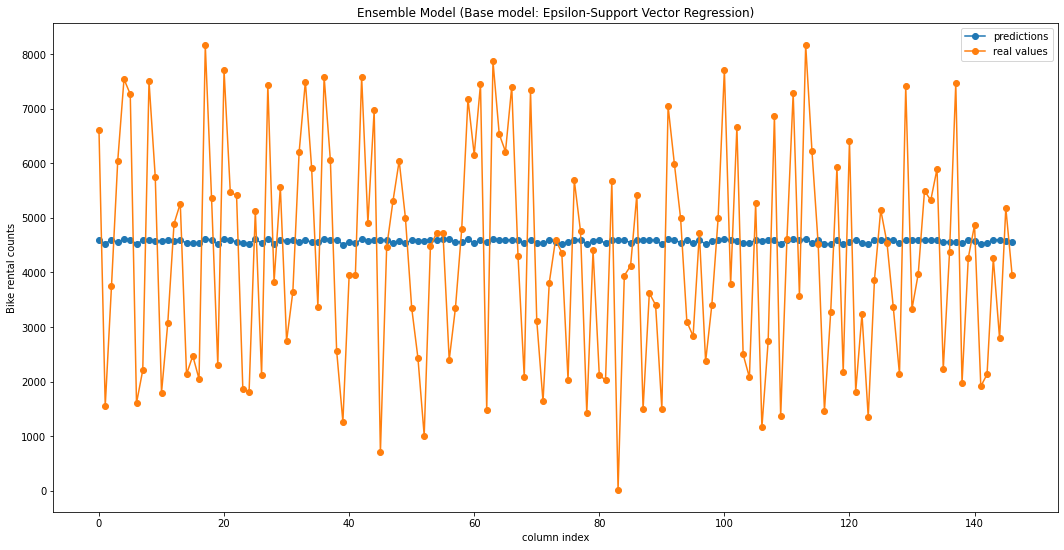

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

print("\nhyperparamter tuning for n_estimators")
for i in [10, 100, 200, 300]:
  ensemble_model = BaggingRegressor(
    base_estimator=SVR(),
    n_estimators=i,
    random_state=42
  )
  ensemble_model.fit(x_train2, y_train2)
  #predictions = ensemble_model.predict(x_val2)
  eval_model(ensemble_model, x_train2, y_train2, x_test2, y_test2, show_output=True, show_graph=False)
  #print("max_features=", i , ": Mean squared error:", mean_squared_error(y_val2, predictions))
  #print("max_features=", i , ": Mean absolute error:", mean_absolute_error(y_val2, predictions),  "\n")

print("\nfinal evaluation with best parameters")
ensemble_model = BaggingRegressor(
    base_estimator=SVR(),
    n_estimators=300,
    random_state=42
)

ensemble_model = BaggingRegressor(
    base_estimator=SVR(),
    n_estimators=300,
    random_state=42
)
ensemble_model.fit(x_train2, y_train2)
predictions = ensemble_model.predict(x_test2)
print("max_features=", i , ": Mean squared error:", mean_squared_error(y_test2, predictions))
print("max_features=", i , ": Mean absolute error:", mean_absolute_error(y_test2, predictions),  "\n")



plt.figure(figsize=(18,9))
plt.plot([i for i in range(len(predictions))], predictions, "-o", label="predictions")
plt.plot([i for i in range(len(y_test2))], y_test2, "-o", label="real values")
plt.legend()
plt.ylabel("Bike rental counts")
plt.xlabel("column index")
plt.title("Ensemble Model (Base model: Epsilon-Support Vector Regression)")

plt.show()

We also implemented our own ensemble machine learning models which trains three different machine learning models (Linear Regression, Decision Tree Regressor and KNeighborsRegressor). Input is used by the all three machine learning models and a mean of the resulting predictions is used as the final prediction.

Explained variance score: -0.2306995370133742
Mean squared error: 4979924.477359922


Text(0.5, 1.0, 'Chimera')

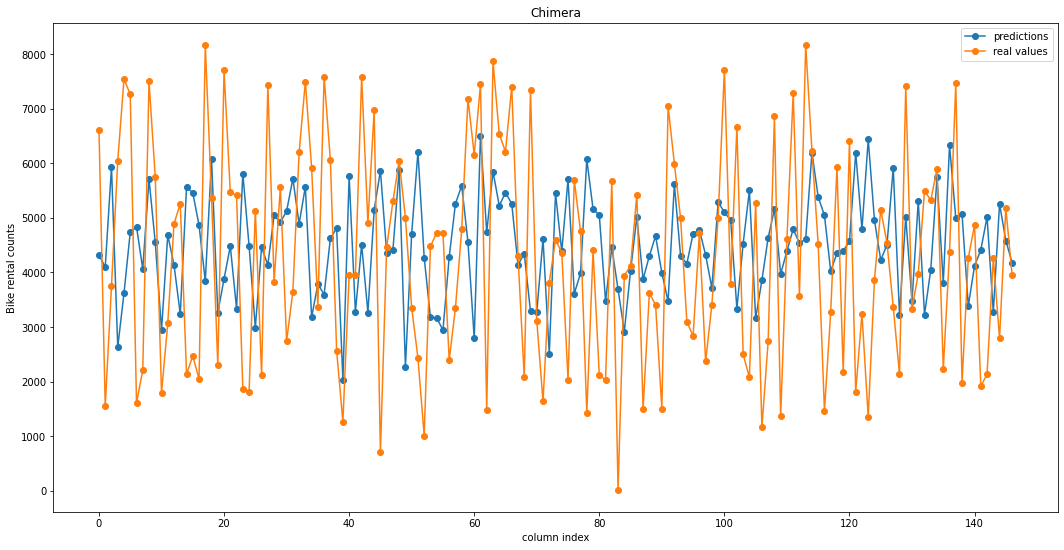

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from joblib import Parallel, delayed


class ChimeraRegressor:
  def __init__(self):
    self.linear_regressor = LinearRegression()
    self.tree = DecisionTreeRegressor(random_state=42)
    self.neigh =  KNeighborsRegressor(n_neighbors=2)
  
  def train_model(self, model, X_train, y_train):
    return model.fit(X_train, y_train)
  
  def fit(self, X_train, y_train):
    self.train_model(self.linear_regressor, X_train ,y_train)
    #self.train_model(self.gpr, X_train ,y_train)
    #self.train_model(self.huber, X_train ,y_train)
    self.train_model(self.tree, X_train ,y_train)
    self.train_model(self.neigh, X_train ,y_train)
  
  def predict(self, X):
    predictions = []
    predictions.append(list(self.tree.predict(X)))
    predictions.append(list(self.neigh.predict(X)))
    predictions.append(list(self.linear_regressor.predict(X)))

    sum_predictions = [0 for _ in range(len(predictions[0]))]
    
    for i in range(len(predictions[0])):
      for prediction in predictions:
        sum_predictions[i] += prediction[i]

    
    final_predictions = [x/3 for x in sum_predictions]
    return final_predictions

chimeraRegressor = ChimeraRegressor()
chimeraRegressor.fit(x_train, y_train)
predictions = chimeraRegressor.predict(x_test2)

plt.figure(figsize=(18,9))
plt.plot([i for i in range(len(predictions))], predictions, "-o", label="predictions")
plt.plot([i for i in range(len(y_test2))], y_test2, "-o", label="real values")
plt.legend()
plt.ylabel("Bike rental counts")
plt.xlabel("column index")
plt.title("Random forest")

print("Explained variance score:", explained_variance_score(y_test2, predictions))
print("Mean squared error:", mean_squared_error(y_test2, predictions))

plt.title("Chimera")

### Results & Discussion


## Conclusion

We have established before that having an idea of a specific day’s rental rates would help rental companies to maximize their profits. By using data from various factors, we have theorized that an algorithm that could predict a day’s rental rates by interpreting these data could be created and utilized for this goal. We have succeeded in writing a machine learning model by comparing various machine learning algorithms like KNN, decision tree etc. and finally settled on a random forest model after seeing the most accurate results. By feeding a specific day’s data to our algorithm, it is possible to predict a roughly accurate result of a day’s rental rates as long as we know the properties of that day.

## Future Work

This project can be made better by gathering more data through means such as data mining and web crawling. The resulting data can be stored in an actual database or even distributed database systems. We can also investigate more factors that may affect a certain day’s rental rates. It is also possible to do classification by trying to predict the type of user given a subset of attributes. Finally, more sophisticated machine learning techniques can be used such as deep learning.

## Work Division


**Alperen Yıldız** -> Implementation of Ensemble Machine Learning Algorithms and testing their validity, explanation of the datasets to describe the problem and introduction of project problem. Implementation of Ensemble Models and their evaluation with different base models such as decision trees and SVC, commentary on resulting graphs, implementation of an ensemble machine learning models that uses 3 different machine learning models.
 
**Utku Alkan** -> Elaborating on the visualization of the factors that are related to the Rental Bike Count and discovering the correlation between those attributes. Arranged hyperparameters of random forest regressor model to optimize the predictions, such as n_estimators and max_features. Evaluated the model with and without dropping the unimportant found attributes in the hypothesis testing. Recreated the train-validation-test model with cross-validation and compared the outcomes. Experimented on the decision tree depth and elaborated on the results.
 
**Rebah Özkoç**-> Implementation of Machine Learning Algorithms and testing their validity. Interpreting the machine learning model results. Dropped attributes that were shown to be irrelevant in hypothesis testing, cross-validation through implementing a function for both cross-validation and graph drawing and hyperparameter tuning of machine learning models. Implemented linear and polynomial machine learning models.
 
**Uğurhan Altınbaş**-> Performing hypothesis tests and commenting on the results. Described the problem, methods and the acquired results of the project in detail. Elaborated on the methods and datasets used. Verbally explained the final answer to the studied problem and mentioned what future endeavours can accomplish.
 
**Ekin Nalbantoğlu** -> Elaborating on the visualization of the factors that are related to the Rental Bike Count and discovering the correlation between those attributes. Arranged hyperparameters of random forest regressor model to optimize the predictions, such as n_estimators and max_features. Evaluated the model with and without dropping the unimportant found attributes in the hypothesis testing. Recreated the train-validation-test model with cross-validation and compared the outcomes. Experimented on the decision tree depth and elaborated on the results.
 
**Metin Alperen Balta**-> Implementation of Machine Learning Algorithms and testing their validity.
